<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Background" data-toc-modified-id="Background-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Background</a></span></li><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#Project-Design-Steps" data-toc-modified-id="Project-Design-Steps-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Project Design Steps</a></span></li><li><span><a href="#Dataset-Cleaning-and--Exploratory-Data-Analysis" data-toc-modified-id="Dataset-Cleaning-and--Exploratory-Data-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Dataset Cleaning and  Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Dataset-Cleaning" data-toc-modified-id="Dataset-Cleaning-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Dataset Cleaning</a></span><ul class="toc-item"><li><span><a href="#Portfolio-Dataset" data-toc-modified-id="Portfolio-Dataset-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Portfolio Dataset</a></span></li><li><span><a href="#Profile-Dataset" data-toc-modified-id="Profile-Dataset-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Profile Dataset</a></span></li><li><span><a href="#Transcript-Dataset" data-toc-modified-id="Transcript-Dataset-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Transcript Dataset</a></span></li><li><span><a href="#Missing-Data-analysis" data-toc-modified-id="Missing-Data-analysis-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>Missing Data analysis</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis-(EDA)" data-toc-modified-id="Exploratory-Data-Analysis-(EDA)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Exploratory Data Analysis (EDA)</a></span><ul class="toc-item"><li><span><a href="#Offer-Type-and-Event" data-toc-modified-id="Offer-Type-and-Event-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Offer Type and Event</a></span></li><li><span><a href="#Gender,-Starbuck-membership-years-and-joining-year" data-toc-modified-id="Gender,-Starbuck-membership-years-and-joining-year-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Gender, Starbuck membership years and joining year</a></span></li><li><span><a href="#Gender,-income-and-age-features" data-toc-modified-id="Gender,-income-and-age-features-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Gender, income and age features</a></span></li></ul></li></ul></li><li><span><a href="#Feature-Engineering-&amp;--Offer-DataFrame" data-toc-modified-id="Feature-Engineering-&amp;--Offer-DataFrame-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Feature Engineering &amp;  Offer DataFrame</a></span><ul class="toc-item"><li><span><a href="#Offer-DataFrame" data-toc-modified-id="Offer-DataFrame-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Offer DataFrame</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Feature Engineering</a></span></li></ul></li><li><span><a href="#Customer-Segmentation-Analysis" data-toc-modified-id="Customer-Segmentation-Analysis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Customer Segmentation Analysis</a></span><ul class="toc-item"><li><span><a href="#K-Means-Clustering" data-toc-modified-id="K-Means-Clustering-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>K-Means Clustering</a></span></li><li><span><a href="#Cluster-Exploratory-Data-Analysis" data-toc-modified-id="Cluster-Exploratory-Data-Analysis-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Cluster Exploratory Data Analysis</a></span></li><li><span><a href="#Segmentation-Analysis-Results" data-toc-modified-id="Segmentation-Analysis-Results-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Segmentation Analysis Results</a></span></li></ul></li><li><span><a href="#Effective-Prediction-Model" data-toc-modified-id="Effective-Prediction-Model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Effective Prediction Model</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Model-Evaluation-and-Results" data-toc-modified-id="Model-Evaluation-and-Results-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Model Evaluation and Results</a></span></li></ul></li><li><span><a href="#Conclusions-and-Future-Improvements" data-toc-modified-id="Conclusions-and-Future-Improvements-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusions and Future Improvements</a></span></li><li><span><a href="#References" data-toc-modified-id="References-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Udacity Starbucks Capstone Challenge

## Background  

The businesses want to target right customers throughout the customer journey which helps to reduce the marketing budget, customer satisfaction as well increase the profits.  Machine learning (ML) and artificial intelligence (AI) technologies are helping automate the digital marketing with real time decision making such as selecting best messaging platform, best timing, and the best offer to the individual customer by integrating data from different platforms [1-4].

Udacity's Starbucks Capstone challenge project  data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Machine learning technique will be used in order to develop effective marketing strategy for the Starbucks business using the available data.  


## Problem Statement 

Starbucks sends out an offer to users of the mobile app every few days. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). The given dataset contains demographic data, record of transactions and details about offer information. This project is divided in three parts.

Following steps are performed:  
-  Customer Segmentations - It is important to know your customers in order to increase business. First, customer segmentation using unsupervised machine learning technique K-means clustering is carried out to understand the current customer characteristics and demographics, and  
- Effective offer Prediction Model - Second  the best performing supervised machine learning model is picked by training and comparing logistic classifier, random forest, decision tree, gradient boost ensemble models performance based on confusion matrix, receiver operating curve (ROC) curve to predict if customer will respond to an offer or not for better targeted marketing. 


## Project Design Steps 


1. Data cleaning and exploratory data analysis (EDA).
2. Feature engineering - Create new features from the raw features and preparing dataframe for customer segmentation and effective offer prediction model.
3. Customer segmentation to know Starbucks current customers characteristics.
4. Offer prediction model - the best performing supervised machine learning model will be build by comparing random forest and boosting ensemble models based on the metrics to predict if customer will respond to an offer or not for better targeted marketing. 

In [1]:
# Importing all packages and libraries

import pandas as pd
import numpy as np
import math
import json

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import time


import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,precision_recall_curve,roc_curve
from sklearn.model_selection import train_test_split



In [2]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

## Dataset Cleaning and  Exploratory Data Analysis



###  Dataset Cleaning 

#### Portfolio Dataset

In [3]:
# read in the Portfolio data
portfolio = pd.read_json('portfolio.json', orient='records', lines=True)

# Check size of the data set, basic statistics and null value counts
print('Portfolio shape : {} ' .format(portfolio.shape)) 
print('\nPortfolio statistics:' ) 
print((portfolio.describe()))

print('\nPortfolio null count:') 
print((portfolio.isnull().sum()))

print('\nPortfolio columns :', list(portfolio.columns))

Portfolio shape : (10, 6) 

Portfolio statistics:
       difficulty   duration     reward
count   10.000000  10.000000  10.000000
mean     7.700000   6.500000   4.200000
std      5.831905   2.321398   3.583915
min      0.000000   3.000000   0.000000
25%      5.000000   5.000000   2.000000
50%      8.500000   7.000000   4.000000
75%     10.000000   7.000000   5.000000
max     20.000000  10.000000  10.000000

Portfolio null count:
channels      0
difficulty    0
duration      0
id            0
offer_type    0
reward        0
dtype: int64

Portfolio columns : ['channels', 'difficulty', 'duration', 'id', 'offer_type', 'reward']


There are no missing values. 

In [4]:
print('Portfolio charecteristics :')
print(portfolio.info())

Portfolio charecteristics :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
channels      10 non-null object
difficulty    10 non-null int64
duration      10 non-null int64
id            10 non-null object
offer_type    10 non-null object
reward        10 non-null int64
dtypes: int64(3), object(3)
memory usage: 560.0+ bytes
None


In [5]:
# cleaning function portfolio references
# credit -  https://stackoverflow.com/questions/45312377/how-to-one-hot-encode-from-a-pandas-column-containing-a-list
# credit - https://stackoverflow.com/questions/29034928/pandas-convert-a-column-of-list-to-dummies
# credit -https://stackoverflow.com/questions/45312377/how-to-one-hot-encode-from-a-pandas-column-containing-a-list/45312577#45312577

def portfolio_clean(portfolio):

    """ 
    Clean, select and transform a DataFrame containing information about offer type and duration
    INPUT:
        portfolio: DataFrame containing offer ids and meta data about 
                   each offer (duration, type, etc.)
    OUTPUT:
        portfolio: clean transformed portfolio DataFrame
    """  
    # conveting channels to list of dummies
    portfolio = portfolio.assign(**pd.get_dummies(portfolio.channels.apply(lambda x:pd.Series(x)).stack()
                                                    .reset_index(level=1,drop=True)).sum(level=0))
    
    #conveting offer type to list of dummies
    portfolio = portfolio.assign(**pd.get_dummies(portfolio.offer_type.apply(lambda x:pd.Series(x)).stack()
                                                   .reset_index(level=1,drop=True)).sum(level=0))
    
    portfolio.rename(columns={'id':'offer_id', 'reward': 'reward_offered'}, inplace =True)
    
    portfolio.drop(['channels'], axis=1, inplace=True)
    
    return portfolio

In [6]:
portfolio_df=portfolio_clean(portfolio)

In [7]:
portfolio_df.head(10)

,difficulty,duration,offer_id,offer_type,reward_offered,email,mobile,social,web,bogo,discount,informational
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,1,1,1,0,1,0,0
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,1,1,1,1,0,0
2,0,4,3f207df678b143eea3cee63160fa8bed,informational,0,1,1,0,1,0,0,1
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1,1,0,1,1,0,0
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,1,0,0,1,0,1,0
5,7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3,1,1,1,1,0,1,0
6,10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2,1,1,1,1,0,1,0
7,0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0,1,1,1,0,0,0,1
8,5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5,1,1,1,1,1,0,0
9,10,7,2906b810c7d4411798c6938adc9daaa5,discount,2,1,1,0,1,0,1,0


#####  Summary of  portfolio dataset 
- Encode offer_type columns
- No direct reward for the information type offer so we will need a strategy to check its offer effectiveness
- duration will be helpful to separate offer and transaction dataframes for further analysis. 
- Channel feature does not look much helpful. We can see that all the offers have been sent through mobile and email with an exception. 
- We will not use channel feature in our model or segmentation. 
- 4 types of bogo, 4 types of discount and 2 types of informational offers were sent. 
- Offer duration - what is expected from the offer duration if its too long or too short, it may not be effective. We will see the when we will complete the analysis. 
- Difficulty - it's minimum amount to be spent to complete offer. We need to see average amount spend and compare difficulty to see what's effective difficulty level. 

####  Profile Dataset

In [8]:
# read profile dataset
profile = pd.read_json('profile.json', orient='records', lines=True)

# Check size of the data set, basic statistics and null value counts
print('Profile  shape : {} ' .format(profile.shape)) 

print('\nProfile data charecteristics {}:' .format(''))
profile.info()

print('\nProfile null count : {} ' .format(''))
profile.isnull().sum()

Profile  shape : (17000, 5) 

Profile data charecteristics :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
age                 17000 non-null int64
became_member_on    17000 non-null int64
gender              14825 non-null object
id                  17000 non-null object
income              14825 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.1+ KB

Profile null count :  


age                    0
became_member_on       0
gender              2175
id                     0
income              2175
dtype: int64

Missing values in the gender and income column. 
Age maximum - 118 - looks like a outlier. We will impute missing data later. 

In [9]:
# cleaning function profile
# credit -  https://stackoverflow.com/questions/43133605/convert-integer-yyyymmdd-to-date-format-mm-dd-yyyy-in-python
import datetime

def profile_clean(profile):

    """ 
    Clean, select and transform a DataFrame containing a demographic data for each customer
    INPUT:
        profile: DataFrame containing offer ids and meta data about 
                   each offer (duration, type, etc.)
    OUTPUT:
        profile: clean and transformed profile DataFrame
    """  
  
    # We can calculate membershipt years using became_member_on data to see how long customer is starbucks member
    profile['date_time'] =pd.to_datetime(profile['became_member_on'], format = '%Y%m%d')
    end_time =(datetime.datetime.today().date())
    start_time =(profile['date_time'].dt.date)
    
    profile['membership_years']=  (end_time -start_time)
    profile['membership_years'] = round((pd.to_numeric(profile['membership_years'].dt.days, downcast='integer')/365),)
   
    # we will keep year to see membership growth over years
    profile['year'] = pd.DatetimeIndex(profile['date_time']).year   

    profile.rename(columns={'id':'customer_id'}, inplace =True)
    profile.drop(['date_time', 'became_member_on'], axis=1,inplace=True)

    return profile

In [10]:
profile_df=profile_clean(profile)

In [11]:
profile_df.head()

,age,gender,customer_id,income,membership_years,year
0,118,None,68be06ca386d4c31939f3a4f0e3dd783,NaN,3.0,2017
1,55,F,0610b486422d4921ae7d2bf64640c50b,112000.0,3.0,2017
2,118,None,38fe809add3b4fcf9315a9694bb96ff5,NaN,2.0,2018
3,75,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,3.0,2017
4,118,None,a03223e636434f42ac4c3df47e8bac43,NaN,3.0,2017


#####  Summary of profile dataframe 
- Important dataset for understanding customer demographic. 
- gender catgorical feature to be encode later
- become_member_on  changed to membership years.
- age maximum value : 118 - looks like outlier. We will impute customer ages above 100 with mean. 
- income and gender columns have more missing values - 2175 which are corresponding to age outlier. We will check overall missing values in the combined dataset to decided if we need to impute or delete missing values.

#### Transcript Dataset

In [12]:
# read in transcript dataset
transcript = pd.read_json('transcript.json', orient='records', lines=True)

# Check size of the data set, basic statistics and null value counts
print('Transcript shape is : {} ' .format(transcript.shape)) 

print('\nTranscript statistics : ' )
print(transcript.describe()) 

print('\nTranscript data charecteristics :')
print(transcript.info())

print('\nTranscript null count :' )
print(transcript.isnull().sum())

Transcript shape is : (306534, 4) 

Transcript statistics : 
                time
count  306534.000000
mean      366.382940
std       200.326314
min         0.000000
25%       186.000000
50%       408.000000
75%       528.000000
max       714.000000

Transcript data charecteristics :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
event     306534 non-null object
person    306534 non-null object
time      306534 non-null int64
value     306534 non-null object
dtypes: int64(1), object(3)
memory usage: 9.4+ MB
None

Transcript null count :
event     0
person    0
time      0
value     0
dtype: int64


No missing values. 


In [13]:
transcript.head()

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [14]:
# transcript value contains amount related to transaction, offer id and reward given 
transcript.tail(5)

,event,person,time,value
306529,transaction,b3a1272bc9904337b331bf348c3e8c17,714,{'amount': 1.5899999999999999}
306530,transaction,68213b08d99a4ae1b0dcb72aebd9aa35,714,{'amount': 9.53}
306531,transaction,a00058cf10334a308c68e7631c529907,714,{'amount': 3.61}
306532,transaction,76ddbd6576844afe811f1a3c0fbb5bec,714,{'amount': 3.5300000000000002}
306533,transaction,c02b10e8752c4d8e9b73f918558531f7,714,{'amount': 4.05}


In [15]:
# let's check what values dictionary includes
transcript.value.value_counts()

{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'}                  14983
{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}                  14924
{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}                  14891
{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}                  14835
{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'}                  14374
{'offer id': '5a8bc65990b245e5a138643cd4eb9837'}                  14305
{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}                  11848
{'offer id': '3f207df678b143eea3cee63160fa8bed'}                  11761
{'offer id': '2906b810c7d4411798c6938adc9daaa5'}                  11750
{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}                  10331
{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4', 'reward': 2}      5317
{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2', 'reward': 3}      5156
{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9', 'reward': 5}      4354
{'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d', 'reward': 5}   

Value column has a dictionary. It contains offer id, reward and amount. 

In [16]:
# cleaning function transcript
# credit - https://stackoverflow.com/questions/58383927/convert-series-of-dict-and-concat-to-dataframe
#https://stackoverflow.com/questions/38134012/pandas-dataframe-fillna-only-some-columns-in-place

def transcript_clean(transcript):

    """ 
    Clean, select and transform a DataFrame containing the records for transactions,
    offer types : received, viewed, completed
    INPUT:
        transcript: DataFrame containing records of transaction, customer id, time and value
                   each offer (duration, type, etc.)
    OUTPUT:
        transcript: clean and transformed transcript DataFrame
    """  
    
    # value column contains disctionary with amount, reward and offer id 
    # it results in nan columns which we will clean later
    transcript = pd.concat([transcript, transcript['value'].apply(pd.Series)], axis = 1)
    transcript = transcript.assign(**pd.get_dummies(transcript.event.apply(lambda x:pd.Series(x)).stack()
                                                    .reset_index(level=1,drop=True)).sum(level=0))
    
    # we will delete offer id column , it contains duplicate/missing information from offer_id related to reward - 
    #we can fill that information from offer_id column - reward offer id
    transcript['offer_id'].fillna(transcript['offer id'],inplace=True)
    transcript.rename(columns={'person':'customer_id', 'reward':'reward_given'}, inplace =True)
    
    #convert number of days - time column to 
    transcript['time'] = round(transcript['time']/24).astype(int)
    
    transcript.drop(['value', 'offer id'], axis=1,inplace=True)

    return transcript

In [17]:
transcript_df=transcript_clean(transcript)

In [18]:
transcript_df.head()

,event,customer_id,time,amount,offer_id,reward_given,offer completed,offer received,offer viewed,transaction
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,0,1,0,0
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,0,1,0,0
2,offer received,e2127556f4f64592b11af22de27a7932,0,NaN,2906b810c7d4411798c6938adc9daaa5,NaN,0,1,0,0
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN,0,1,0,0
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,0,1,0,0


#####   Summary of Transcript dataframe
- Value column separated in to offer id, reward and amount columns. 
- Event column separated to offer received, offer completed, offer viewed and transaction
- time converted to days. 




In [19]:
# Merge transcript and profile and portfolio data
df_merged=pd.merge(transcript_df,  profile_df, on='customer_id', how='left')
df_temp=pd.merge(df_merged,  portfolio_df, on='offer_id', how='left')

In [20]:
df_merged.head()

,event,customer_id,time,amount,offer_id,reward_given,offer completed,offer received,offer viewed,transaction,age,gender,income,membership_years,year
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,0,1,0,0,75,F,100000.0,3.0,2017
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,0,1,0,0,118,None,NaN,3.0,2017
2,offer received,e2127556f4f64592b11af22de27a7932,0,NaN,2906b810c7d4411798c6938adc9daaa5,NaN,0,1,0,0,68,M,70000.0,2.0,2018
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN,0,1,0,0,118,None,NaN,3.0,2017
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,0,1,0,0,118,None,NaN,3.0,2017


In [21]:
df_temp.head()

,event,customer_id,time,amount,offer_id,reward_given,offer completed,offer received,offer viewed,transaction,age,gender,income,membership_years,year,difficulty,duration,offer_type,reward_offered,email,mobile,social,web,bogo,discount,informational
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,0,1,0,0,75,F,100000.0,3.0,2017,5.0,7.0,bogo,5.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,0,1,0,0,118,None,NaN,3.0,2017,20.0,10.0,discount,5.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,offer received,e2127556f4f64592b11af22de27a7932,0,NaN,2906b810c7d4411798c6938adc9daaa5,NaN,0,1,0,0,68,M,70000.0,2.0,2018,10.0,7.0,discount,2.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN,0,1,0,0,118,None,NaN,3.0,2017,10.0,10.0,discount,2.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,0,1,0,0,118,None,NaN,3.0,2017,10.0,5.0,bogo,10.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0


In [22]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306534 entries, 0 to 306533
Data columns (total 26 columns):
event               306534 non-null object
customer_id         306534 non-null object
time                306534 non-null int32
amount              138953 non-null float64
offer_id            167581 non-null object
reward_given        33579 non-null float64
offer completed     306534 non-null uint8
offer received      306534 non-null uint8
offer viewed        306534 non-null uint8
transaction         306534 non-null uint8
age                 306534 non-null int64
gender              272762 non-null object
income              272762 non-null float64
membership_years    306534 non-null float64
year                306534 non-null int64
difficulty          167581 non-null float64
duration            167581 non-null float64
offer_type          167581 non-null object
reward_offered      167581 non-null float64
email               167581 non-null float64
mobile              167581 no

In [23]:
print('Percentage of missing data  in the profile dataset ')
print(profile_df.isna().sum()*100/(profile_df.customer_id.count()))

Percentage of missing data  in the profile dataset 
age                  0.000000
gender              12.794118
customer_id          0.000000
income              12.794118
membership_years     0.000000
year                 0.000000
dtype: float64


In [24]:
print('Percentage of event=offer_completed data with missing  gender')
print(df_merged[(df_merged['gender'].isna())&(df_merged['event']=='offer completed')
               ].customer_id.count()*100/df_merged[(df_merged['event']=='offer completed')].customer_id.count())   

Percentage of event=offer_completed data with missing  gender
3.3800887459424045


In [25]:
print('Percentage of event=transaction data with missing gender')
print(df_merged[(df_merged['gender'].isna())&(df_merged['event']=='transaction')
               ].customer_id.count()*100/df_merged[(df_merged['event']=='transaction')].customer_id.count())   

Percentage of event=transaction data with missing gender
10.79213834893813


#### Missing Data analysis 
If there is less than 5\%  of missing data and features are not important then we can delete the data. However, we have almost 12.79\% missing customers profile. It belongs to gender and income  columns. To further understand missing data, we had a closer look at the transcript and profile combined dataframe. We can see that with 10.79\% missing customer transaction data and 3.38 \%  missing gender data. It's important feature. We have 17000 customer data. It can  overall affect the segmentation analysis and offer predictions modeling.Thus, we will impute income with mean values and gender with unknown 'U'. Age has an outlier as seen from the histogram. We will impute above 100 age value with mean.


In [26]:
df_temp.groupby ('customer_id').gender.unique().value_counts()

[M]       8484
[F]       6129
[None]    2175
[O]        212
Name: gender, dtype: int64

In [27]:
 # only gender and income column showed nan values. We will clean the data # dropped data comment
# fill gender as unknown - others -O
df_temp.income.fillna(df_temp.income.mean(), inplace=True)
df_temp.gender.fillna('U', inplace =True)

In [28]:
df_temp.groupby ('customer_id').gender.unique().value_counts()

[M]    8484
[F]    6129
[U]    2175
[O]     212
Name: gender, dtype: int64

Text(0.5, 1.0, 'Age Histogram')

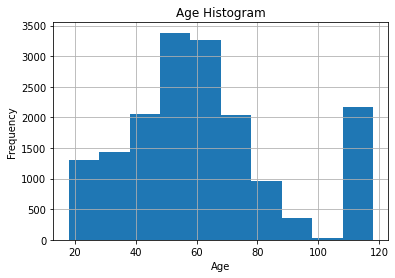

In [29]:
df_temp.groupby ('customer_id').age.mean().hist()

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Histogram')

We will impute age above 100 with mean age. Customers might have filled wrong values intentionally. 

In [30]:
# Replace the age>100 with mean age
df_temp['age'] = df_temp['age'].astype('int32')

mean_age=int(df_temp.age.mean())
df_temp.loc[df_temp.age>100., 'age'] = mean_age

Text(0.5, 1.0, 'Age Histogram')

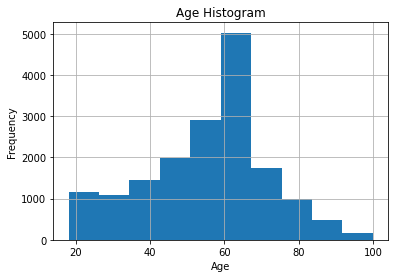

In [31]:
df_temp.groupby ('customer_id').age.mean().hist()

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Histogram')

In [32]:
# pickle data
df_merged.to_pickle('df_merged.pkl')
df_temp.to_pickle('df_temp.pkl')

# read data
df_merged = pd.read_pickle('df_merged.pkl')
df_temp = pd.read_pickle('df_temp.pkl')

In [33]:
df_temp.head()

,event,customer_id,time,amount,offer_id,reward_given,offer completed,offer received,offer viewed,transaction,age,gender,income,membership_years,year,difficulty,duration,offer_type,reward_offered,email,mobile,social,web,bogo,discount,informational
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,0,1,0,0,75,F,100000.000000,3.0,2017,5.0,7.0,bogo,5.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,0,1,0,0,60,U,64337.000755,3.0,2017,20.0,10.0,discount,5.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,offer received,e2127556f4f64592b11af22de27a7932,0,NaN,2906b810c7d4411798c6938adc9daaa5,NaN,0,1,0,0,68,M,70000.000000,2.0,2018,10.0,7.0,discount,2.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN,0,1,0,0,60,U,64337.000755,3.0,2017,10.0,10.0,discount,2.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,0,1,0,0,60,U,64337.000755,3.0,2017,10.0,5.0,bogo,10.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0


In [34]:
df_temp.isna().sum()

event                    0
customer_id              0
time                     0
amount              167581
offer_id            138953
reward_given        272955
offer completed          0
offer received           0
offer viewed             0
transaction              0
age                      0
gender                   0
income                   0
membership_years         0
year                     0
difficulty          138953
duration            138953
offer_type          138953
reward_offered      138953
email               138953
mobile              138953
social              138953
web                 138953
bogo                138953
discount            138953
informational       138953
dtype: int64

### Exploratory Data Analysis (EDA)  

####  Offer Type and Event

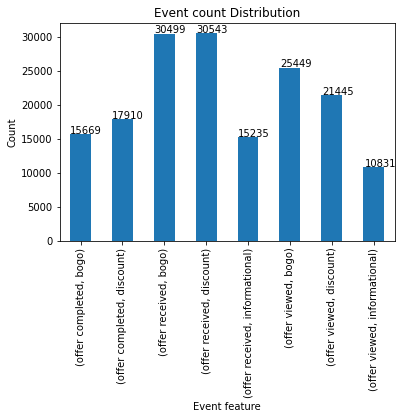

,event,count
0,offer completed,33579
1,offer received,76277
2,offer viewed,57725
3,transaction,138953


In [35]:
# https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
#Let's check different offer type and transactions event counts

ax = df_temp.groupby(['event','offer_type'])['customer_id'].count().plot.bar()
plt.xlabel('Event feature')
plt.ylabel('Count')
plt.title('Event count Distribution')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    
plt.show()
list1=df_temp.groupby(['event']).customer_id.count()


df=pd.DataFrame(list1).reset_index()
df.rename(columns={'customer_id':'count'}, inplace=True)
df

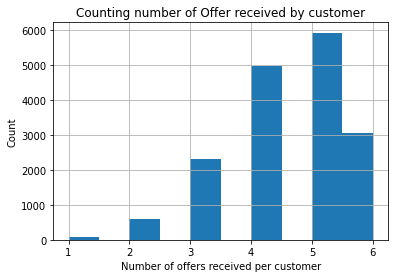

Offer completed transaction count  24.17  % from all customer transactions
and many customers received more than 4 offers.
Total starbucks customers in the dataset
17000
How many customers received offers?
16994
How many customers completed the bogo and discount offers?


12774

In [36]:
#### Let's see how many offers received per customers

df_temp[df_temp['event']=='offer received'].groupby('customer_id')['event'].count().hist()
plt.xlabel('Number of offers received per customer')
plt.ylabel('Count')
plt.title('Counting number of Offer received by customer')
plt.show()

# we have not seperated informational offer transactions. 
print('Offer completed transaction count ',round((df_temp[(df_temp['event']=='offer completed')].customer_id.count()*100/
                                           df_temp[(df_temp['event']=='transaction')].event.count()),2),' % from all customer transactions' )
print('and many customers received more than 4 offers.')

print('Total starbucks customers in the dataset')
print(profile_df.shape[0])

print('How many customers received offers?')
print(len(df_temp[df_temp['event']=='offer received'].groupby('customer_id')['event'].value_counts()))

# we will checck about informational offer completion later. 
print('How many customers completed the bogo and discount offers?')
(len(df_temp[df_temp['event']=='offer completed'].groupby('customer_id')['event'].value_counts()))


 #####  Observations: Offer Type & Event Analysis

- Almost same number of bogo and discount offers were sent to the customers. 
- Bogo offer : More bogo offers were viewed as compared to discount offers. However, bogo offer view rate is above 80% and bogo
  offer completion rate is around 50%. 
- Discount offer : More discount offers were completed as compared to bogo offers. Discount offer view rate is around 70% and
  offer completion rate is 58%
- Informational offer - offer view rate is around 70%, We will calculate informational offer completion rate later. 
- Overall, offer completion rate 45% and offer view rate is 76%. We need to count informational offer related transaction later. and informational offer completion rate. 
- 45% transaction data and 24% bogo and discount offer related transaction data. 
- Information offer view rate is around 70%

#### Gender, Starbuck membership years and joining year

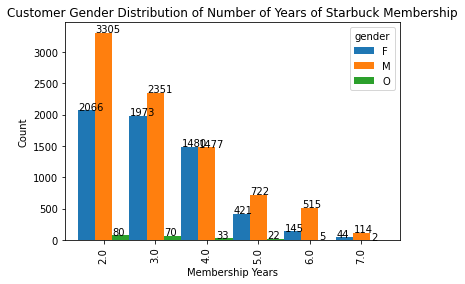

In [37]:
ax2=pd.crosstab(profile_df['membership_years'],profile_df['gender']).plot.bar(width=1)

plt.xlabel('Membership Years')
plt.ylabel('Count')
plt.title('Customer Gender Distribution of Number of Years of Starbuck Membership')
for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

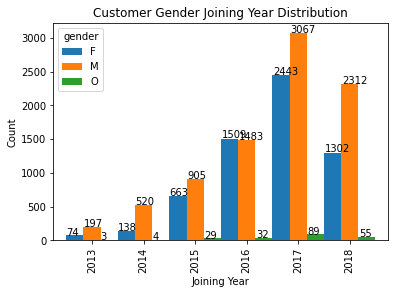

In [38]:
#plt.figure(figsize=(10,20))
ax3=pd.crosstab(profile_df['year'],profile_df['gender']).plot.bar(width=1)
plt.xlabel('Joining Year')
plt.ylabel('Count')
plt.title('Customer Gender Joining Year Distribution')
for p in ax3.patches:
    ax3.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

#####  Observations: Gender, Starbucks membership years and joining year
- More members have completed 2 -3 years of membership period. May be more members are joining in the recent years than before. 
- Maximum number of new customers joined in 2017
- More male members - Out of 17000 (2175- missing customer data) Starbucks have around 57% male customers. 


####  Gender, income and age features

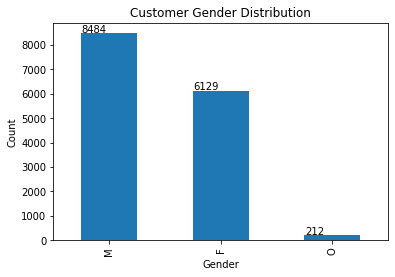

In [39]:
# Gender distribution
profile_df= profile_df.dropna(axis=0, subset=['gender'])
ax3=profile_df.gender.value_counts().plot.bar()
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Customer Gender Distribution')

for p in ax3.patches:
    ax3.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

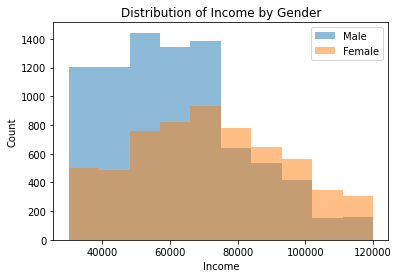

In [40]:
# Income  and gender distribution
plt.hist('income', data=profile_df[profile_df['gender'] == 'M'], alpha=0.5, label='Male');
plt.hist('income', data=profile_df[profile_df['gender'] == 'F'], alpha=0.5, label='Female');
plt.title('Distribution of Income by Gender');
plt.xlabel('Income');
plt.ylabel('Count')
plt.legend();

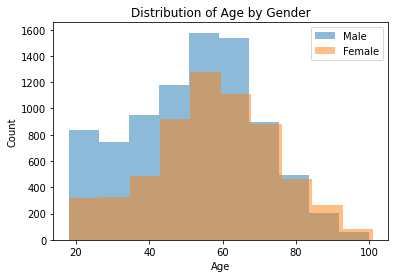

In [41]:
#https://towardsdatascience.com/customer-segmentation-analysis-with-python-6afa16a38d9e
# Age  and gender distribution
plt.hist('age', data=profile_df[profile_df['gender'] == 'M'], alpha=0.5, label='Male');
plt.hist('age', data=profile_df[profile_df['gender'] == 'F'], alpha=0.5, label='Female');
plt.title('Distribution of Age by Gender');
plt.xlabel('Age');
plt.ylabel('Count')
plt.legend();

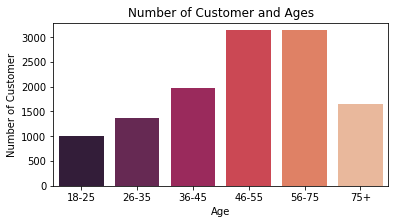

In [42]:
#https://github.com/cdabakoglu/data-science/blob/master/Mall_Customers_KMeans/Mall_Customers_KMeans.ipynb

age18_25 = profile_df.age[(profile_df.age <= 25) & (profile_df.age >= 18)]
age26_35 = profile_df.age[(profile_df.age <= 35) & (profile_df.age >= 26)]
age36_45 = profile_df.age[(profile_df.age <= 45) & (profile_df.age >= 36)]
age46_55 = profile_df.age[(profile_df.age <= 55) & (profile_df.age >= 46)]
age56_75 = profile_df.age[(profile_df.age <= 75) & (profile_df.age >= 56)]
age75above = profile_df.age[profile_df.age >= 76]
x = ["18-25","26-35","36-45","46-55","56-75","75+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age46_55.values),len(age75above.values)]

plt.figure(figsize=(6,3))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

##### Observations: Age, Gender and Income distribution analysis.
- More Male customer than female 
- Starbucks has more younger male customers as compared to female. 
- Male customers have high income than female
- More members are older with age above 50. 



Text(0.5, 1.0, 'Channel type distribution of offer sent medium')

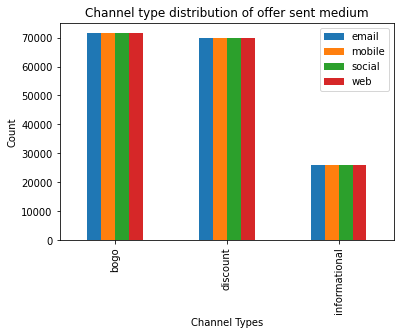

In [43]:
# plot channel type etc

df_temp.groupby('offer_type')['email', 'mobile', 'social', 'web'].count().plot.bar()
plt.xlabel('Channel Types')
plt.ylabel('Count')
plt.title('Channel type distribution of offer sent medium')



All the offers have been sent through all channels. We will not use this feature. 

## Feature Engineering &  Offer DataFrame 


### Offer DataFrame

We need to define successful and failed offer. Following challenges were mentioned in the Starbucks dataset. 
- Not all users receive the same offer
- Different validity period for the offer type and informational offer to influence customer.
- Customer might make a purchase through the app without having received an offer or seen an offer
- A user can receive an offer, never actually view the offer, and still complete the offer





In order to define effectiveness of the offer fail/success of a sent offer. Let's have a closer look at a single customer transaction history from the merged transcript, profile and portfolio dataframe. We can see following characteristics. 
Let's define our binary classifier. offer fail  =0 (customer was not influenced by the offer ) and offer success=1 (customer did purchase due to offer). Based on the customer purchase history, we define the effective offer
- bogo and discount offer success =1:
  offer received | offer viewed | Offer completed | transaction (within offer validity -duration) 
- informational offer success = 1:
  offer received |offer viewed | transaction (within offer validity -duration)
- bogo and discount offer fail =0:
  offer received | offer viewed | transaction (not within offer validity -duration) 
- bogo and discount offer  fail =0: 
  offer received | transaction | offer viewed  (within offer validity -duration)
- bogo and discount offer fail =0: 
  offer received | offer viewed and no transaction 
- We saw above that transaction without offer sent to them when offer id is Nan 
  (We will filter informational offer successful transaction later)
  



In [44]:
df_temp.columns

Index(['event', 'customer_id', 'time', 'amount', 'offer_id', 'reward_given',
       'offer completed', 'offer received', 'offer viewed', 'transaction',
       'age', 'gender', 'income', 'membership_years', 'year', 'difficulty',
       'duration', 'offer_type', 'reward_offered', 'email', 'mobile', 'social',
       'web', 'bogo', 'discount', 'informational'],
      dtype='object')

In [45]:
# drop unecessary column
df_temp.drop(columns={'email', 'mobile', 'social','web'}, inplace= True)
# rearrange columns
df_temp = df_temp[['customer_id', 'offer_id', 'time', 'event', 'amount', 'reward_given', 
                   'difficulty', 'duration', 'offer_type', 'reward_offered','age', 
                   'offer completed', 'offer received', 'offer viewed', 'transaction','bogo', 'discount',
                   'informational', 'gender', 'income', 'membership_years', 'year']]

# sort by 'customer_id','offer_id','time'
df_temp.sort_values(by=['customer_id','offer_id','time'], inplace=True)
df_temp.head()

,customer_id,offer_id,time,event,amount,reward_given,difficulty,duration,offer_type,reward_offered,age,offer completed,offer received,offer viewed,transaction,bogo,discount,informational,gender,income,membership_years,year
247879,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,24,offer received,NaN,NaN,10.0,7.0,discount,2.0,33,0,1,0,0,0.0,1.0,0.0,M,72000.0,3.0,2017
258884,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,24,offer completed,NaN,2.0,10.0,7.0,discount,2.0,33,1,0,0,0,0.0,1.0,0.0,M,72000.0,3.0,2017
113605,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,14,offer received,NaN,NaN,0.0,4.0,informational,0.0,33,0,1,0,0,0.0,0.0,1.0,M,72000.0,3.0,2017
139992,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,16,offer viewed,NaN,NaN,0.0,4.0,informational,0.0,33,0,0,1,0,0.0,0.0,1.0,M,72000.0,3.0,2017
55972,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,7,offer received,NaN,NaN,0.0,3.0,informational,0.0,33,0,1,0,0,0.0,0.0,1.0,M,72000.0,3.0,2017


In [46]:
# Close look at the customer 12ede229379747bd8d74ccdc20097ca3 : transaction only customer and did not receive any offer too
df_temp[df_temp['customer_id'].str.match('12ede229379747bd8d74ccdc20097ca3')]

,customer_id,offer_id,time,event,amount,reward_given,difficulty,duration,offer_type,reward_offered,age,offer completed,offer received,offer viewed,transaction,bogo,discount,informational,gender,income,membership_years,year
22092,12ede229379747bd8d74ccdc20097ca3,NaN,1,transaction,16.62,NaN,NaN,NaN,NaN,NaN,91,0,0,0,1,NaN,NaN,NaN,M,70000.0,5.0,2015
109815,12ede229379747bd8d74ccdc20097ca3,NaN,14,transaction,27.60,NaN,NaN,NaN,NaN,NaN,91,0,0,0,1,NaN,NaN,NaN,M,70000.0,5.0,2015
292962,12ede229379747bd8d74ccdc20097ca3,NaN,27,transaction,19.03,NaN,NaN,NaN,NaN,NaN,91,0,0,0,1,NaN,NaN,NaN,M,70000.0,5.0,2015


In [47]:
# Close look at the customer 8dbfa485249f409aa223a2130f40634a :regular customer received few offers, completed 3 and few non offer related transaction 
df_temp[df_temp['customer_id'].str.match('8dbfa485249f409aa223a2130f40634a')].head(15)

,customer_id,offer_id,time,event,amount,reward_given,difficulty,duration,offer_type,reward_offered,age,offer completed,offer received,offer viewed,transaction,bogo,discount,informational,gender,income,membership_years,year
250248,8dbfa485249f409aa223a2130f40634a,0b1e1539f2cc45b7b9fa7c272da2e1d7,24,offer received,NaN,NaN,20.0,10.0,discount,5.0,63,0,1,0,0,0.0,1.0,0.0,M,48000.0,4.0,2015
288522,8dbfa485249f409aa223a2130f40634a,0b1e1539f2cc45b7b9fa7c272da2e1d7,27,offer viewed,NaN,NaN,20.0,10.0,discount,5.0,63,0,0,1,0,0.0,1.0,0.0,M,48000.0,4.0,2015
296924,8dbfa485249f409aa223a2130f40634a,0b1e1539f2cc45b7b9fa7c272da2e1d7,28,offer completed,NaN,5.0,20.0,10.0,discount,5.0,63,1,0,0,0,0.0,1.0,0.0,M,48000.0,4.0,2015
155778,8dbfa485249f409aa223a2130f40634a,2298d6c36e964ae4a3e7e9706d1fb8c2,17,offer received,NaN,NaN,7.0,7.0,discount,3.0,63,0,1,0,0,0.0,1.0,0.0,M,48000.0,4.0,2015
180899,8dbfa485249f409aa223a2130f40634a,2298d6c36e964ae4a3e7e9706d1fb8c2,18,offer viewed,NaN,NaN,7.0,7.0,discount,3.0,63,0,0,1,0,0.0,1.0,0.0,M,48000.0,4.0,2015
219710,8dbfa485249f409aa223a2130f40634a,2298d6c36e964ae4a3e7e9706d1fb8c2,21,offer completed,NaN,3.0,7.0,7.0,discount,3.0,63,1,0,0,0,0.0,1.0,0.0,M,48000.0,4.0,2015
5105,8dbfa485249f409aa223a2130f40634a,4d5c57ea9a6940dd891ad53e9dbe8da0,0,offer received,NaN,NaN,10.0,5.0,bogo,10.0,63,0,1,0,0,1.0,0.0,0.0,M,48000.0,4.0,2015
13728,8dbfa485249f409aa223a2130f40634a,4d5c57ea9a6940dd891ad53e9dbe8da0,0,offer viewed,NaN,NaN,10.0,5.0,bogo,10.0,63,0,0,1,0,1.0,0.0,0.0,M,48000.0,4.0,2015
206684,8dbfa485249f409aa223a2130f40634a,ae264e3637204a6fb9bb56bc8210ddfd,21,offer received,NaN,NaN,10.0,7.0,bogo,10.0,63,0,1,0,0,1.0,0.0,0.0,M,48000.0,4.0,2015
226099,8dbfa485249f409aa223a2130f40634a,ae264e3637204a6fb9bb56bc8210ddfd,22,offer viewed,NaN,NaN,10.0,7.0,bogo,10.0,63,0,0,1,0,1.0,0.0,0.0,M,48000.0,4.0,2015


In [48]:
# Close look at the customer eb540099db834cf59001f83a4561aef3 :transaction only cutomer - did not received any ffer 
df_temp[df_temp['customer_id'].str.match('eb540099db834cf59001f83a4561aef3')].head(3)

,customer_id,offer_id,time,event,amount,reward_given,difficulty,duration,offer_type,reward_offered,age,offer completed,offer received,offer viewed,transaction,bogo,discount,informational,gender,income,membership_years,year
16379,eb540099db834cf59001f83a4561aef3,NaN,0,transaction,4.74,NaN,NaN,NaN,NaN,NaN,66,0,0,0,1,NaN,NaN,NaN,F,34000.0,3.0,2017
108268,eb540099db834cf59001f83a4561aef3,NaN,13,transaction,5.09,NaN,NaN,NaN,NaN,NaN,66,0,0,0,1,NaN,NaN,NaN,F,34000.0,3.0,2017
228700,eb540099db834cf59001f83a4561aef3,NaN,22,transaction,7.40,NaN,NaN,NaN,NaN,NaN,66,0,0,0,1,NaN,NaN,NaN,F,34000.0,3.0,2017


In [49]:
# Close look at the customer : regular customer - multiole offers received, few transactions and three offers completed successfully
df_temp[df_temp['customer_id'].str.match('0020ccbbb6d84e358d3414a3ff76cffd')].head(10)

,customer_id,offer_id,time,event,amount,reward_given,difficulty,duration,offer_type,reward_offered,age,offer completed,offer received,offer viewed,transaction,bogo,discount,informational,gender,income,membership_years,year
59352,0020ccbbb6d84e358d3414a3ff76cffd,2298d6c36e964ae4a3e7e9706d1fb8c2,7,offer received,NaN,NaN,7.0,7.0,discount,3.0,24,0,1,0,0,0.0,1.0,0.0,F,60000.0,3.0,2016
67584,0020ccbbb6d84e358d3414a3ff76cffd,2298d6c36e964ae4a3e7e9706d1fb8c2,7,offer viewed,NaN,NaN,7.0,7.0,discount,3.0,24,0,0,1,0,0.0,1.0,0.0,F,60000.0,3.0,2016
88010,0020ccbbb6d84e358d3414a3ff76cffd,2298d6c36e964ae4a3e7e9706d1fb8c2,9,offer completed,NaN,3.0,7.0,7.0,discount,3.0,24,1,0,0,0,0.0,1.0,0.0,F,60000.0,3.0,2016
156808,0020ccbbb6d84e358d3414a3ff76cffd,5a8bc65990b245e5a138643cd4eb9837,17,offer received,NaN,NaN,0.0,3.0,informational,0.0,24,0,1,0,0,0.0,0.0,1.0,F,60000.0,3.0,2016
165442,0020ccbbb6d84e358d3414a3ff76cffd,5a8bc65990b245e5a138643cd4eb9837,17,offer viewed,NaN,NaN,0.0,3.0,informational,0.0,24,0,0,1,0,0.0,0.0,1.0,F,60000.0,3.0,2016
207725,0020ccbbb6d84e358d3414a3ff76cffd,9b98b8c7a33c4b65b9aebfe6a799e6d9,21,offer received,NaN,NaN,5.0,7.0,bogo,5.0,24,0,1,0,0,1.0,0.0,0.0,F,60000.0,3.0,2016
263808,0020ccbbb6d84e358d3414a3ff76cffd,9b98b8c7a33c4b65b9aebfe6a799e6d9,24,offer viewed,NaN,NaN,5.0,7.0,bogo,5.0,24,0,0,1,0,1.0,0.0,0.0,F,60000.0,3.0,2016
273123,0020ccbbb6d84e358d3414a3ff76cffd,9b98b8c7a33c4b65b9aebfe6a799e6d9,25,offer completed,NaN,5.0,5.0,7.0,bogo,5.0,24,1,0,0,0,1.0,0.0,0.0,F,60000.0,3.0,2016
117013,0020ccbbb6d84e358d3414a3ff76cffd,f19421c1d4aa40978ebb69ca19b0e20d,14,offer received,NaN,NaN,5.0,5.0,bogo,5.0,24,0,1,0,0,1.0,0.0,0.0,F,60000.0,3.0,2016
131476,0020ccbbb6d84e358d3414a3ff76cffd,f19421c1d4aa40978ebb69ca19b0e20d,14,offer viewed,NaN,NaN,5.0,5.0,bogo,5.0,24,0,0,1,0,1.0,0.0,0.0,F,60000.0,3.0,2016


In [50]:
# Close look at the customer :regular customer - 
#received many offers, did not complete bogo or discount offer successfully, but informational offer was effective
df_temp[df_temp['customer_id'].str.match('0009655768c64bdeb2e877511632db8f')].head()

,customer_id,offer_id,time,event,amount,reward_given,difficulty,duration,offer_type,reward_offered,age,offer completed,offer received,offer viewed,transaction,bogo,discount,informational,gender,income,membership_years,year
247879,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,24,offer received,NaN,NaN,10.0,7.0,discount,2.0,33,0,1,0,0,0.0,1.0,0.0,M,72000.0,3.0,2017
258884,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,24,offer completed,NaN,2.0,10.0,7.0,discount,2.0,33,1,0,0,0,0.0,1.0,0.0,M,72000.0,3.0,2017
113605,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,14,offer received,NaN,NaN,0.0,4.0,informational,0.0,33,0,1,0,0,0.0,0.0,1.0,M,72000.0,3.0,2017
139992,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,16,offer viewed,NaN,NaN,0.0,4.0,informational,0.0,33,0,0,1,0,0.0,0.0,1.0,M,72000.0,3.0,2017
55972,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,7,offer received,NaN,NaN,0.0,3.0,informational,0.0,33,0,1,0,0,0.0,0.0,1.0,M,72000.0,3.0,2017


We can confirm that Customer id  0009655768c64bdeb2e877511632db8f  has  no bogo or discount offers completed succesfully. He completed 2 informational offers. 

#####  Which offer sent  were effective?
Filter effective offer using pandas.core.groupby.DataFrameGroupBy.shift method.
For each customer_id and offer_id and offer_type i.e. discount or bogo  and bogo with discount, check if the event in sequence offer_received > offer viewed > offer completed
And  within offer time duration then total_offer_success = 1

##### Effective offer bogo

In [51]:
# Sort data
df_temp.fillna(0,inplace=True)
df_temp.sort_values(by=['customer_id','offer_id','time'], inplace=True)

# let's create offer success column to finalize dataframe
df_temp['offer_success_bogo'] = 0

# Filter effective offer using pandas.core.groupby.DataFrameGroupBy.shift method. 

# for each customer_id and offer_id and offer_type equal discount or bogo, check if the 
# event in sequence offer_received > offer viewed > offer completed
# within offer time duration then total_offer_success = 1
df_temp.loc[( ((df_temp.offer_type=='bogo') ) \
        &( df_temp.customer_id==df_temp.customer_id.shift(1) )\
        &( df_temp.offer_id==df_temp.offer_id.shift(1) )\
        &( df_temp.offer_type==df_temp.offer_type.shift(1) )\
        &( df_temp.customer_id==df_temp.customer_id.shift(2) )\
        &( df_temp.offer_id==df_temp.offer_id.shift(2) )\
        &( df_temp.offer_type==df_temp.offer_type.shift(2) )\
        &( df_temp.event=='offer completed' )\
        &( df_temp.event.shift(1)=='offer viewed')\
        &( df_temp.event.shift(2)=='offer received' )\
        &( (df_temp.time-df_temp.time.shift(1)) <= df_temp.duration )\
        &( (df_temp.time-df_temp.time.shift(2)) <= df_temp.duration )\
        &( (df_temp.time-df_temp.time.shift(1)) >=0 )\
        &( (df_temp.time-df_temp.time.shift(2)) >=0 ) \
       ), 'offer_success_bogo'] = 1

#####  Effective offer discount

In [52]:
# Sort data
df_temp.fillna(0,inplace=True)
df_temp.sort_values(by=['customer_id','offer_id','time'], inplace=True)

# let's create offer success column to finalize dataframe
df_temp['offer_success_discount'] = 0

# Filter effective offer using pandas.core.groupby.DataFrameGroupBy.shift method. 

# for each customer_id and offer_id and offer_type equal discount or bogo, check if the 
# event in sequence offer_received > offer viewed > offer completed
# within offer time duration then total_offer_success = 1
df_temp.loc[( ((df_temp.offer_type=='discount')) \
        &( df_temp.customer_id==df_temp.customer_id.shift(1) )\
        &( df_temp.offer_id==df_temp.offer_id.shift(1) )\
        &( df_temp.offer_type==df_temp.offer_type.shift(1) )\
        &( df_temp.customer_id==df_temp.customer_id.shift(2) )\
        &( df_temp.offer_id==df_temp.offer_id.shift(2) )\
        &( df_temp.offer_type==df_temp.offer_type.shift(2) )\
        &( df_temp.event=='offer completed' )\
        &( df_temp.event.shift(1)=='offer viewed')\
        &( df_temp.event.shift(2)=='offer received' )\
        &( (df_temp.time-df_temp.time.shift(1)) <= df_temp.duration )\
        &( (df_temp.time-df_temp.time.shift(2)) <= df_temp.duration )\
        &( (df_temp.time-df_temp.time.shift(1)) >=0 )\
        &( (df_temp.time-df_temp.time.shift(2)) >=0 ) \
       ), 'offer_success_discount'] = 1

#####  Effective offer completed informational
Filter informational offer using pandas.core.groupby.DataFrameGroupBy.shift method.
For each customer_id and offer_id and offer_type equal informational, check if the event in sequence offer_received > offer viewed > transaction.
And transaction within offer time duration then informational offer is completed = 1.

In [53]:
# informational offer completed feature

df_temp['offer_completed_informational']=0

offer_completed_informational =df_temp.loc[( (df_temp.offer_type=='informational')\
        &( df_temp.customer_id==df_temp.customer_id.shift(1) )\
        &( df_temp.offer_id==df_temp.offer_id.shift(1) )\
        &( df_temp.offer_type==df_temp.offer_type.shift(1) )\
        &( df_temp.event=='offer viewed' )\
        &( df_temp.event.shift(1)=='offer received')\
        &( (df_temp.time-df_temp.time.shift(1)) <= df_temp.duration )\
        &( (df_temp.time-df_temp.time.shift(1)) >=0 )\
#         &( (df.time-df.time.shift(2)) >=0 ) \
       ), 'offer_completed_informational'] = 1

In [54]:
# count bogo, discount and informational  offer received by customer
offer_received = df_temp[df_temp['event']=='offer received'].groupby('customer_id').offer_type.value_counts().unstack()
offer_received.reset_index(drop=False,inplace=True)
offer_received=offer_received.fillna(0)
offer_received.rename_axis(None, axis=1,inplace =True)
# calculate total offer received by each customer
offer_received['total_offer_received'] = offer_received['bogo'] + offer_received['discount']+offer_received['informational']

offer_received.rename(columns={'bogo':'offer_received_bogo', 'discount':'offer_received_discount',
                                    'informational': 'offer_received_informational'},inplace =True)
offer_received.head()

,customer_id,offer_received_bogo,offer_received_discount,offer_received_informational,total_offer_received
0,0009655768c64bdeb2e877511632db8f,1.0,2.0,2.0,5.0
1,00116118485d4dfda04fdbaba9a87b5c,2.0,0.0,0.0,2.0
2,0011e0d4e6b944f998e987f904e8c1e5,1.0,2.0,2.0,5.0
3,0020c2b971eb4e9188eac86d93036a77,2.0,2.0,1.0,5.0
4,0020ccbbb6d84e358d3414a3ff76cffd,2.0,1.0,1.0,4.0


In [55]:
#count how many bogo, discount and informational offers viewed by each customer
offer_viewed =df_temp[df_temp['event']=='offer viewed'].groupby('customer_id').offer_type.value_counts().unstack()
offer_viewed.reset_index(drop=False,inplace=True)
offer_viewed.rename_axis(None, axis=1,inplace =True)
offer_viewed.fillna(0,inplace=True)
# Calculate total number of offers viewed by each customer. 
offer_viewed['total_offer_viewed'] = offer_viewed['bogo'] + offer_viewed['discount']+offer_viewed['informational']
offer_viewed.rename(columns={'bogo':'offer_viewed_bogo', 'discount':'offer_viewed_discount',
                             'informational': 'offer_viewed_informational'},inplace =True)
offer_viewed.head()

,customer_id,offer_viewed_bogo,offer_viewed_discount,offer_viewed_informational,total_offer_viewed
0,0009655768c64bdeb2e877511632db8f,1.0,1.0,2.0,4.0
1,00116118485d4dfda04fdbaba9a87b5c,2.0,0.0,0.0,2.0
2,0011e0d4e6b944f998e987f904e8c1e5,1.0,2.0,2.0,5.0
3,0020c2b971eb4e9188eac86d93036a77,1.0,1.0,1.0,3.0
4,0020ccbbb6d84e358d3414a3ff76cffd,2.0,1.0,1.0,4.0


In [56]:
#count bogo and discount offer completed by each customer
offer_completed =df_temp.loc[df_temp['event']=='offer completed'].groupby('customer_id').offer_type.value_counts().unstack()
offer_completed.reset_index(drop=False,inplace=True)
offer_completed.rename_axis(None, axis=1,inplace =True)
offer_completed.fillna(0,inplace=True)

offer_completed.rename(columns={'bogo':'offer_completed_bogo', 'discount':'offer_completed_discount'}, inplace =True)


print(round(offer_completed.shape[0]*100/profile_df.shape[0],2), '% percentage of Starbucks customers completed offers')
offer_completed.head()


86.17 % percentage of Starbucks customers completed offers


,customer_id,offer_completed_bogo,offer_completed_discount
0,0009655768c64bdeb2e877511632db8f,1.0,2.0
1,0011e0d4e6b944f998e987f904e8c1e5,1.0,2.0
2,0020c2b971eb4e9188eac86d93036a77,1.0,2.0
3,0020ccbbb6d84e358d3414a3ff76cffd,2.0,1.0
4,003d66b6608740288d6cc97a6903f4f0,0.0,3.0


In [57]:
# Temporary dataframe 
df1=pd.merge(offer_received,offer_viewed,on='customer_id', how='left')
df2=pd.merge(df1,offer_completed,on='customer_id', how='left')
df2.head()

,customer_id,offer_received_bogo,offer_received_discount,offer_received_informational,total_offer_received,offer_viewed_bogo,offer_viewed_discount,offer_viewed_informational,total_offer_viewed,offer_completed_bogo,offer_completed_discount
0,0009655768c64bdeb2e877511632db8f,1.0,2.0,2.0,5.0,1.0,1.0,2.0,4.0,1.0,2.0
1,00116118485d4dfda04fdbaba9a87b5c,2.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,NaN,NaN
2,0011e0d4e6b944f998e987f904e8c1e5,1.0,2.0,2.0,5.0,1.0,2.0,2.0,5.0,1.0,2.0
3,0020c2b971eb4e9188eac86d93036a77,2.0,2.0,1.0,5.0,1.0,1.0,1.0,3.0,1.0,2.0
4,0020ccbbb6d84e358d3414a3ff76cffd,2.0,1.0,1.0,4.0,2.0,1.0,1.0,4.0,2.0,1.0


### Feature Engineering

Customer demographic dataframe is grouped by customer. There are 17000 customers.  Following are the engineered features for each customer. 

-   Types of offers received, viewed and completed  : bogo,discount and informational ( 9 Features)
-   Total offers received, viewed and completed : all types of offers (3 features)
-   total transaction count, average transaction amount and total transaction amount - total number of transactions, average amount spent for each transaction and total amount spent by the customer(3 features)
- total reward given to customer for completing offer and average reward given per transaction (2 features)
- average offer difficulty - minimum amount needed to be spent for completing offer. This feature can show how level of offer difficulty impacts the offer completion. 
- offer completion rate - Number of completed offers sum(only successful/ effective offers) / Number of offers received (all offers received sum) (1 feature)
- offer view rate - Number of offer viewed/ Number of offers received. (1  feature)
- similarly, we obtain bogo, discount and informational offer completion rate (3 features)
- transaction only customers (1 feature) - We will mark the transaction only customers. 
- demographic raw features - age, income, membership_years (3 features) 
- We will encode gender features. (3 features)
- total offer success (bogo, discount and informational) -number  offers completed successfully.(1 feature)
- Output binary classification feature : offer_success- if customer has completed at least one offer successfully  and failed if not a single offer completed - 0. 



In [58]:

# calculate total transaction amount for each customer.
total_transaction_amount=df_temp.groupby(['customer_id'], as_index=False).amount.sum()
total_transaction_amount.rename(columns={'amount':'total_transaction_amount'},inplace=True)

# calculate total transaction count for each customer
total_transaction_count=df_temp[df_temp['event']=='transaction'].groupby('customer_id',as_index=False).event.count()
total_transaction_count.rename(columns={'event':'total_transaction_count'},inplace=True)

#calculate average transaction amount spent per transaction by each customer 
average_transaction_amount=df_temp.groupby(['customer_id'], as_index=False).amount.mean()
average_transaction_amount.rename(columns={'amount':'average_transaction_amount'},inplace=True)

#calculate total reward given to each customer
total_reward_given = df_temp.groupby(['customer_id'],as_index=False).reward_given.sum()
total_reward_given.rename(columns={'reward_given':'total_reward_given'},inplace=True)

# average reward received per transaction
average_reward_given=df_temp.groupby(['customer_id'], as_index=False).reward_given.mean()
average_reward_given.rename(columns={'reward_given':'average_reward_given'},inplace=True)

# Feature - offer_diffuclty - to see how offer completion is affected by difficulty amount
# We use  mean offer difficulty amount. 
average_difficulty=df_temp[df_temp['event']=='offer completed'
                        ].groupby(['customer_id'], as_index=False).difficulty.mean()

average_difficulty.rename(columns={'difficulty':'average_difficulty'},inplace=True)

# count and added successful offer column  for each customer 
offer_success_bogo=df_temp.groupby('customer_id',as_index=False).offer_success_bogo.sum()

# count and added successful offer column  for each customer 
offer_success_discount=df_temp.groupby('customer_id',as_index=False).offer_success_discount.sum()

# count informational offer completed by each customer
offer_success_informational=df_temp.groupby('customer_id',as_index=False).offer_completed_informational.sum()

In [59]:
# combine features to create a effective offer dataframe
from functools import reduce
demographic_df=reduce(lambda x,y: pd.merge(x,y, on='customer_id', how='left'),
                      [df2,total_transaction_amount,total_transaction_count, average_transaction_amount,
                       total_reward_given, average_reward_given,offer_success_informational, 
                       average_difficulty, offer_success_bogo,offer_success_discount])

In [60]:
demographic_df.isna().sum()

customer_id                         0
offer_received_bogo                 0
offer_received_discount             0
offer_received_informational        0
total_offer_received                0
offer_viewed_bogo                 160
offer_viewed_discount             160
offer_viewed_informational        160
total_offer_viewed                160
offer_completed_bogo             4220
offer_completed_discount         4220
total_transaction_amount            0
total_transaction_count           422
average_transaction_amount          0
total_reward_given                  0
average_reward_given                0
offer_completed_informational       0
average_difficulty               4220
offer_success_bogo                  0
offer_success_discount              0
dtype: int64

160 customers did not view any of the offers sent. Total 4220 customers who did not complete bogo and discount offer. 
422 customers did not do any transactions. 

In [61]:
demographic_df[demographic_df['customer_id'].str.match('68be06ca386d4c31939f3a4f0e3dd783')]

,customer_id,offer_received_bogo,offer_received_discount,offer_received_informational,total_offer_received,offer_viewed_bogo,offer_viewed_discount,offer_viewed_informational,total_offer_viewed,offer_completed_bogo,offer_completed_discount,total_transaction_amount,total_transaction_count,average_transaction_amount,total_reward_given,average_reward_given,offer_completed_informational,average_difficulty,offer_success_bogo,offer_success_discount
6959,68be06ca386d4c31939f3a4f0e3dd783,0.0,5.0,0.0,5.0,0.0,5.0,0.0,5.0,0.0,2.0,20.4,9.0,0.971429,5.0,0.238095,0,8.5,0,2


In [62]:
demographic_df.fillna(0,inplace=True)

We can confirm customer_id 68be06ca386d4c31939f3a4f0e3dd783 : 2 discount offers completed successfully

More new features based on demographic dataframe.

In [63]:
# transaction only customers - i.e. transaction occured without offer
#demographic_df['transaction_onlycustomers'] = np.where((demographic_df['total_offer_completed'].isnull()&demographic_df['offer_viewed_informational'].isnull()), 1, 0)
# total offer completed - all types of offer completed (bogo+discount+informational) by the customer successfully or effectively

demographic_df['total_success_completed']= demographic_df['offer_success_discount']+\
                                           demographic_df['offer_completed_informational']+\
                                           demographic_df['offer_success_bogo']
demographic_df['total_offer_completed'] =  demographic_df['offer_completed_bogo'] +\
                                           demographic_df['offer_completed_discount']+\
                                           demographic_df['offer_completed_informational']
# offer success rate - total_success_completed/tptal_offer_completed.
#demographic_df['offer success rate']  = demographic_df['total_success_completed']/['total_offer_completed']
# offer view rate - all types of offer sent (bogo+discount+informational) and viewed by the customer 
demographic_df['offer_view_rate']= demographic_df['total_offer_viewed']/demographic_df['total_offer_received']

demographic_df['bogo_view_rate'] = demographic_df['offer_viewed_bogo']/demographic_df['offer_received_bogo']

demographic_df['discount_view_rate'] = demographic_df['offer_viewed_discount']/demographic_df['offer_received_discount']

# informational offer view rate  -informational offer sent  and viewed by the customer 
demographic_df['informational_view_rate']=demographic_df['offer_viewed_informational']/demographic_df['offer_received_informational']

# offer completion rate - how many offers were sent divided by offer completed succesfully
demographic_df['offer_completion_rate']=demographic_df['total_success_completed']/demographic_df['total_offer_received']

#bogo completion rate - how many bogo offers were sent divided by bogo offer completed (includes failed offers too)
demographic_df['bogo_completion_rate']=demographic_df['offer_success_bogo']/demographic_df['offer_received_bogo']

#discount completion rate - how many discount offers were sent divided by bogo offer completed (includes failed offers too)
demographic_df['discount_completion_rate']=demographic_df['offer_success_discount']\
                                           +demographic_df['offer_received_discount']


# informational offer completion rate - how many informational offers were sent divided by  completed
demographic_df['informational_completion_rate']=demographic_df['offer_completed_informational']+\
                                                demographic_df['offer_received_informational']







In [64]:
demographic_df.shape

(16994, 30)

In [65]:
demographic_df.isna().sum()

customer_id                         0
offer_received_bogo                 0
offer_received_discount             0
offer_received_informational        0
total_offer_received                0
offer_viewed_bogo                   0
offer_viewed_discount               0
offer_viewed_informational          0
total_offer_viewed                  0
offer_completed_bogo                0
offer_completed_discount            0
total_transaction_amount            0
total_transaction_count             0
average_transaction_amount          0
total_reward_given                  0
average_reward_given                0
offer_completed_informational       0
average_difficulty                  0
offer_success_bogo                  0
offer_success_discount              0
total_success_completed             0
total_offer_completed               0
offer_view_rate                     0
bogo_view_rate                   2002
discount_view_rate               2049
informational_view_rate          6447
offer_comple

Nan values indicated that some customers did not recieve or view or completed offer. We will fill nan values with 0. 

In [66]:
demographic_df.fillna(0, inplace=True)

In [67]:
# Merge profile dataframe to add demographic information to offer dataframe

df_temp['gender'] = df_temp['gender'].map({'M':1, 'F':2, 'O':3, 'U':4})
df_final=df_temp.groupby('customer_id')['age','gender','income','membership_years','year'].mean().reset_index()
final_customer_df= pd.merge(demographic_df, df_final, on= 'customer_id', how='left')

final_customer_df['income']=final_customer_df['income'].astype(int, inplace=True)

In [68]:
final_customer_df.head()

,customer_id,offer_received_bogo,offer_received_discount,offer_received_informational,total_offer_received,offer_viewed_bogo,offer_viewed_discount,offer_viewed_informational,total_offer_viewed,offer_completed_bogo,offer_completed_discount,total_transaction_amount,total_transaction_count,average_transaction_amount,total_reward_given,average_reward_given,offer_completed_informational,average_difficulty,offer_success_bogo,offer_success_discount,total_success_completed,total_offer_completed,offer_view_rate,bogo_view_rate,discount_view_rate,informational_view_rate,offer_completion_rate,bogo_completion_rate,discount_completion_rate,informational_completion_rate,age,gender,income,membership_years,year
0,0009655768c64bdeb2e877511632db8f,1.0,2.0,2.0,5.0,1.0,1.0,2.0,4.0,1.0,2.0,127.60,8.0,6.380000,9.0,0.450000,2,8.333333,0,0,2,5.0,0.8,1.0,0.5,1.0,0.4,0.0,2.0,4.0,33,1,72000,3.0,2017
1,00116118485d4dfda04fdbaba9a87b5c,2.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,0.0,0.0,4.09,3.0,0.584286,0.0,0.000000,0,0.000000,0,0,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,60,4,64337,2.0,2018
2,0011e0d4e6b944f998e987f904e8c1e5,1.0,2.0,2.0,5.0,1.0,2.0,2.0,5.0,1.0,2.0,79.46,5.0,4.414444,13.0,0.722222,2,10.666667,1,2,5,5.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,4.0,40,3,57000,2.0,2018
3,0020c2b971eb4e9188eac86d93036a77,2.0,2.0,1.0,5.0,1.0,1.0,1.0,3.0,1.0,2.0,196.86,8.0,10.361053,14.0,0.736842,0,10.000000,1,1,2,3.0,0.6,0.5,0.5,1.0,0.4,0.5,3.0,1.0,59,2,90000,4.0,2016
4,0020ccbbb6d84e358d3414a3ff76cffd,2.0,1.0,1.0,4.0,2.0,1.0,1.0,4.0,2.0,1.0,154.05,12.0,6.697826,13.0,0.565217,1,5.666667,2,1,4,4.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,24,2,60000,3.0,2016


In [69]:
# create dummies for gender

final_customer_df= pd.concat([final_customer_df, pd.get_dummies(final_customer_df['gender'])], axis= 1)

final_customer_df['offer_success']=final_customer_df['total_success_completed'].map({0:0, 1:1, 2:1, 3:1, 4:1, 5:1, 6:1})

# change column names
final_customer_df.rename(columns={1:'M', 2:'F', 3:'O', 4:'U'}, inplace=True)
                                                                               
final_customer_df.fillna(0,inplace=True)

# write final customer df to csv
final_customer_df.to_csv("final_customer.csv", index=False)

In [70]:
final_customer_df.head()

,customer_id,offer_received_bogo,offer_received_discount,offer_received_informational,total_offer_received,offer_viewed_bogo,offer_viewed_discount,offer_viewed_informational,total_offer_viewed,offer_completed_bogo,offer_completed_discount,total_transaction_amount,total_transaction_count,average_transaction_amount,total_reward_given,average_reward_given,offer_completed_informational,average_difficulty,offer_success_bogo,offer_success_discount,total_success_completed,total_offer_completed,offer_view_rate,bogo_view_rate,discount_view_rate,informational_view_rate,offer_completion_rate,bogo_completion_rate,discount_completion_rate,informational_completion_rate,age,gender,income,membership_years,year,M,F,O,U,offer_success
0,0009655768c64bdeb2e877511632db8f,1.0,2.0,2.0,5.0,1.0,1.0,2.0,4.0,1.0,2.0,127.60,8.0,6.380000,9.0,0.450000,2,8.333333,0,0,2,5.0,0.8,1.0,0.5,1.0,0.4,0.0,2.0,4.0,33,1,72000,3.0,2017,1,0,0,0,1
1,00116118485d4dfda04fdbaba9a87b5c,2.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,0.0,0.0,4.09,3.0,0.584286,0.0,0.000000,0,0.000000,0,0,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,60,4,64337,2.0,2018,0,0,0,1,0
2,0011e0d4e6b944f998e987f904e8c1e5,1.0,2.0,2.0,5.0,1.0,2.0,2.0,5.0,1.0,2.0,79.46,5.0,4.414444,13.0,0.722222,2,10.666667,1,2,5,5.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,4.0,40,3,57000,2.0,2018,0,0,1,0,1
3,0020c2b971eb4e9188eac86d93036a77,2.0,2.0,1.0,5.0,1.0,1.0,1.0,3.0,1.0,2.0,196.86,8.0,10.361053,14.0,0.736842,0,10.000000,1,1,2,3.0,0.6,0.5,0.5,1.0,0.4,0.5,3.0,1.0,59,2,90000,4.0,2016,0,1,0,0,1
4,0020ccbbb6d84e358d3414a3ff76cffd,2.0,1.0,1.0,4.0,2.0,1.0,1.0,4.0,2.0,1.0,154.05,12.0,6.697826,13.0,0.565217,1,5.666667,2,1,4,4.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,24,2,60000,3.0,2016,0,1,0,0,1


## Customer Segmentation Analysis

It is important to know your customers in order to do a better targeted marketing. In this part, customer segmentation using unsupervised machine learning technique K-means clustering is carried out to understand current customer characteristics and demographics. All engineered features are used  to find subgroups of customers with similar purchase behavior and offer response.

### K-Means Clustering  

KMeans algorithm is an iterative algorithm which separates the dataset into distinct and non-overlapping subgroups (clusters). Number of clusters are selected based on the elbow method. Metrics used to determine the number of clusters is Within-Cluster-Sum-of-Squares (WCSS) is the summation of observations from their cluster centroids.
It a plot of  a k number of clusters assigned clusters’ centroids and WCSS. The k value is picked at the spot where WCSS forms an elbow before it flattens. 



In [71]:
customer_df=final_customer_df.copy()
customer_df.drop(columns='customer_id', inplace=True)


##### Number of clusters using elbow method



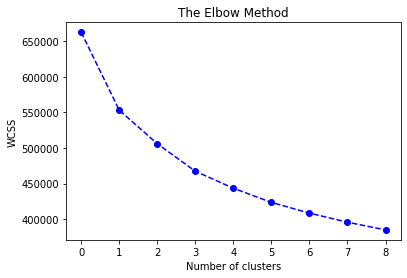

In [72]:
# not scaling age
ss= StandardScaler()
customer_df_ss = ss.fit_transform(customer_df)

wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10,random_state = 42)
    kmeans.fit(customer_df_ss)
    wcss.append(kmeans.inertia_)
plt.plot( wcss, linestyle='--', marker='o', color='b')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

##### Number of clusters : 3

In [73]:
# K-Means fitting
km=KMeans(n_clusters = 3)
km.fit(customer_df_ss)

# cluster transform
cluster_transform = pd.DataFrame(ss.inverse_transform(customer_df_ss), columns = customer_df.columns)
cluster_transform['cluster_label'] = km.labels_ 
cluster_center = pd.DataFrame(km.cluster_centers_, columns = customer_df.columns)
cluster_center

,offer_received_bogo,offer_received_discount,offer_received_informational,total_offer_received,offer_viewed_bogo,offer_viewed_discount,offer_viewed_informational,total_offer_viewed,offer_completed_bogo,offer_completed_discount,total_transaction_amount,total_transaction_count,average_transaction_amount,total_reward_given,average_reward_given,offer_completed_informational,average_difficulty,offer_success_bogo,offer_success_discount,total_success_completed,total_offer_completed,offer_view_rate,bogo_view_rate,discount_view_rate,informational_view_rate,offer_completion_rate,bogo_completion_rate,discount_completion_rate,informational_completion_rate,age,gender,income,membership_years,year,M,F,O,U,offer_success
0,0.052121,0.083274,-0.558126,-0.312916,-0.067546,-0.139752,-0.793351,-0.634510,-0.568892,-0.476337,-0.529770,-0.339335,-0.423019,-0.674851,-0.564092,-0.798624,-0.453667,-0.584747,-0.441873,-1.042672,-1.019423,-0.562952,-0.162214,-0.214904,-0.876970,-1.027745,-0.619816,-0.167177,-0.708978,-0.109190,0.149946,-0.258833,-0.221688,0.231737,0.057776,-0.239226,-0.041746,0.271260,-1.107751
1,0.255027,0.186385,-0.313098,0.207371,0.331346,0.311421,-0.244444,0.372817,0.800688,0.672683,0.644315,0.404717,0.504229,0.948601,0.829579,-0.231100,0.552495,0.800078,0.600749,0.730523,0.835034,0.299594,0.299989,0.273315,-0.136879,0.686257,0.782335,0.422445,-0.291872,0.098828,-0.214054,0.292870,0.233618,-0.243083,-0.043909,0.284337,0.032943,-0.353939,0.441519
2,-0.359432,-0.302841,0.880409,0.023481,-0.346787,-0.258155,1.005159,0.106149,-0.477491,-0.402582,-0.320269,-0.195336,-0.243144,-0.564928,-0.517227,0.993461,-0.275167,-0.462651,-0.344892,0.029697,-0.119279,0.132456,-0.224158,-0.144585,0.947405,0.070780,-0.409702,-0.370096,0.988409,-0.024302,0.129554,-0.129554,-0.089817,0.092507,0.002565,-0.136502,-0.003348,0.193489,0.442360


In [74]:
cluster_transform.head()

,offer_received_bogo,offer_received_discount,offer_received_informational,total_offer_received,offer_viewed_bogo,offer_viewed_discount,offer_viewed_informational,total_offer_viewed,offer_completed_bogo,offer_completed_discount,total_transaction_amount,total_transaction_count,average_transaction_amount,total_reward_given,average_reward_given,offer_completed_informational,average_difficulty,offer_success_bogo,offer_success_discount,total_success_completed,total_offer_completed,offer_view_rate,bogo_view_rate,discount_view_rate,informational_view_rate,offer_completion_rate,bogo_completion_rate,discount_completion_rate,informational_completion_rate,age,gender,income,membership_years,year,M,F,O,U,offer_success,cluster_label
0,1.0,2.0,2.000000e+00,5.0,1.0,1.0,2.0,4.0,1.0,2.0,127.60,8.0,6.380000,9.000000e+00,0.450000,2.0,8.333333,0.0,0.0,2.0,5.0,0.8,1.0,0.5,1.0,0.4,0.0,2.0,4.0,33.0,1.0,72000.0,3.0,2017.0,1.0,0.0,0.0,0.0,1.0,2
1,2.0,0.0,1.110223e-16,2.0,2.0,0.0,0.0,2.0,0.0,0.0,4.09,3.0,0.584286,-1.776357e-15,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,4.0,64337.0,2.0,2018.0,0.0,0.0,0.0,1.0,0.0,0
2,1.0,2.0,2.000000e+00,5.0,1.0,2.0,2.0,5.0,1.0,2.0,79.46,5.0,4.414444,1.300000e+01,0.722222,2.0,10.666667,1.0,2.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,4.0,40.0,3.0,57000.0,2.0,2018.0,0.0,0.0,1.0,0.0,1.0,1
3,2.0,2.0,1.000000e+00,5.0,1.0,1.0,1.0,3.0,1.0,2.0,196.86,8.0,10.361053,1.400000e+01,0.736842,0.0,10.000000,1.0,1.0,2.0,3.0,0.6,0.5,0.5,1.0,0.4,0.5,3.0,1.0,59.0,2.0,90000.0,4.0,2016.0,0.0,1.0,0.0,0.0,1.0,1
4,2.0,1.0,1.000000e+00,4.0,2.0,1.0,1.0,4.0,2.0,1.0,154.05,12.0,6.697826,1.300000e+01,0.565217,1.0,5.666667,2.0,1.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,24.0,2.0,60000.0,3.0,2016.0,0.0,1.0,0.0,0.0,1.0,1


### Cluster Exploratory Data Analysis

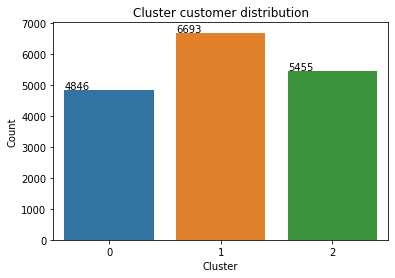

In [75]:
ax=sns.countplot(cluster_transform['cluster_label'])
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Cluster customer distribution')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

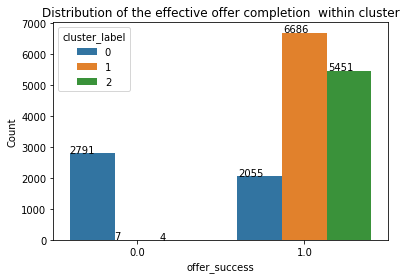

In [76]:
ax5=sns.countplot(cluster_transform['offer_success'], hue=cluster_transform['cluster_label'],data=cluster_transform)
plt.xlabel('offer_success')
plt.ylabel('Count')
plt.title('Distribution of the effective offer completion  within cluster')

for p in ax5.patches:
    ax5.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

- Cluster 0 - The number of customers responding to offer is around 50 %. 
- cluster 1 - Almost all customers responded to the offer from this cluster. 
- cluster 2 - Similar to cluster 1, i.e. almost all the customers completed the offer successfully.

In [77]:
print('Total offer completed',(final_customer_df.total_offer_completed.sum().astype(int)))
print('Total effective offers',final_customer_df.total_success_completed.sum())

Total offer completed 43709
Total effective offers 33397


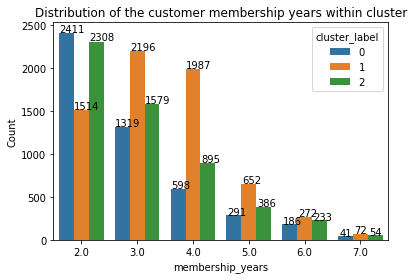

In [78]:
ax=sns.countplot(x='membership_years', hue=cluster_transform['cluster_label'], data=cluster_transform)

plt.xlabel('membership_years')
plt.ylabel('Count')
plt.title('Distribution of the customer membership years within cluster')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()
plt.show()

Text(0.5, 1.0, 'Distribution of the effective bogo offer completion  within cluster')

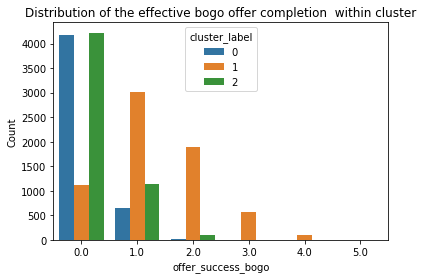

In [79]:
ax=sns.countplot(x='offer_success_bogo', hue=cluster_transform['cluster_label'], data=cluster_transform)
plt.xlabel('offer_success_bogo')
plt.ylabel('Count')
plt.title('Distribution of the effective bogo offer completion  within cluster')


Cluster 1 customers are more interested in the bogo offer. 

Text(0.5, 1.0, 'Distribution of the effective discount offer completion  within cluster')

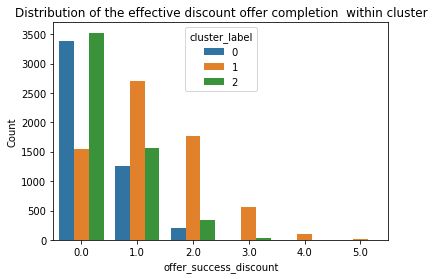

In [80]:
ax=sns.countplot(x='offer_success_discount', hue=cluster_transform['cluster_label'], data=cluster_transform)
plt.xlabel('offer_success_discount')
plt.ylabel('Count')
plt.title('Distribution of the effective discount offer completion  within cluster')

Again cluster 1 customers likes discount offer most. 

Text(0.5, 1.0, 'Distribution of the effective informational offer completion  within cluster')

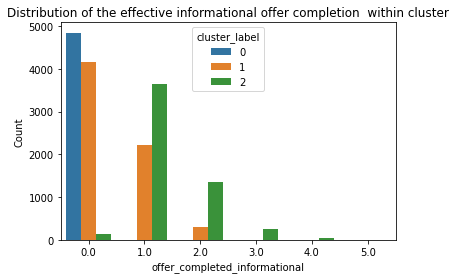

In [81]:
ax=sns.countplot(x='offer_completed_informational', hue=cluster_transform['cluster_label'], data=cluster_transform)
plt.xlabel('offer_completed_informational')
plt.ylabel('Count')
plt.title('Distribution of the effective informational offer completion  within cluster')

Cluster 2 customers responded to informational offers most. 

Text(0.5, 1.0, 'Distribution of offer type effectiveness in the Starbucks customer demographic')

<Figure size 1440x1080 with 0 Axes>

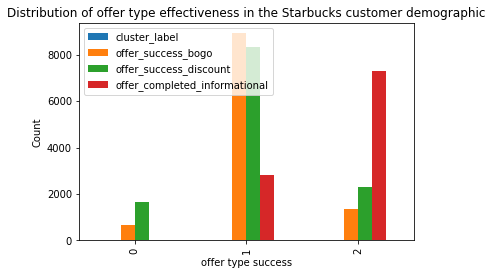

In [82]:
plt.figure(figsize=(20,15))
cluster_transform[['cluster_label','offer_success_bogo','offer_success_discount',
                   'offer_completed_informational']].groupby('cluster_label').sum().reset_index().plot.bar()

plt.xlabel('offer type success')
plt.ylabel('Count')
plt.title('Distribution of offer type effectiveness in the Starbucks customer demographic')

- Cluster 0 - not influenced by any type of offers much. May not respond to the offers.
- Cluster 1 - customers interested in both bogo and discount offers. Some customers are interested in informational offer. These customer are likely to respond to the offer.
- Cluster 2 -  responded more to the informational offer. 

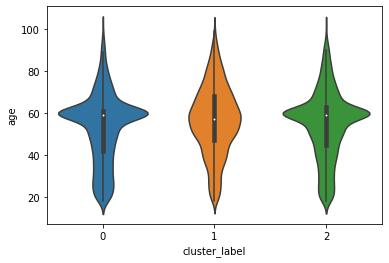

In [83]:
sns.violinplot(x='cluster_label',y='age',data=cluster_transform)

- Cluster 0 & 2 : Inclused young and 40-60 age group.
- Cluster 1 : consists more older customers.

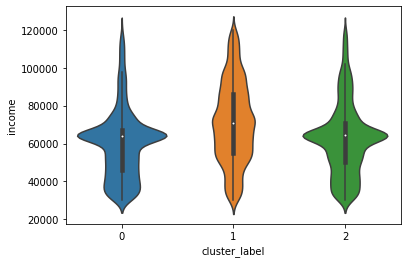

In [84]:
sns.violinplot(x='cluster_label',y='income',data=cluster_transform)

- Cluster 0 shows low income customers. 
- Cluster 1  includes high income groups. 
- Cluster 2 medium to high income group. 

Text(0.5, 1.0, 'Distribution of gender within the cluster')

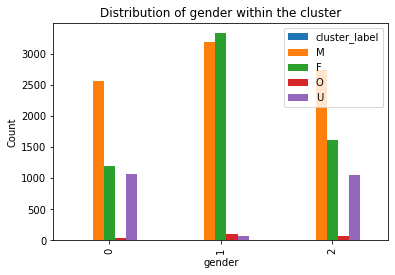

In [85]:
cluster_transform[['cluster_label', 'M','F','O','U']].groupby('cluster_label').sum().reset_index().plot.bar()

plt.xlabel('gender')
plt.ylabel('Count')
plt.title('Distribution of gender within the cluster')

- Cluster 0 - male dominated cluster.  
- Cluster 1 - consists of both comparable male and female customers 
- Cluster 2 - again male dominated cluster.

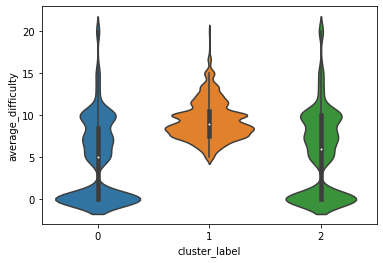

In [86]:
sns.violinplot(x='cluster_label',y='average_difficulty',data=cluster_transform)

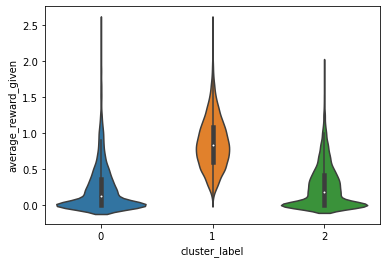

In [87]:
sns.violinplot(x='cluster_label',y='average_reward_given',data=cluster_transform)

- Cluster 1 - we saw that they are more interested in offers so received more awards. 
- Cluster 0 and 2  did not receive much awards. Because cluster 0 is not responsive to offer and cluster 2 is more interested in informational offer which does not give direct reward. 

Text(345.84662000868053, 0.5, 'Count')

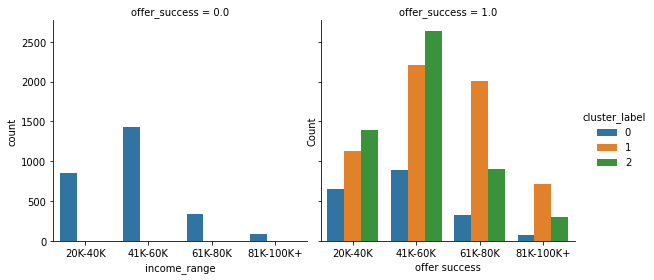

In [88]:
bins = [30000, 50000,  70000, 90000, 100000]
labels =  ['20K-40K','41K-60K','61K-80K','81K-100K+']
cluster_transform['income_range'] = pd.cut(cluster_transform.income, bins, labels = labels,include_lowest = True)

ax = sns.catplot(x="income_range", hue="cluster_label", col="offer_success",
                data=cluster_transform, kind="count",
                height=4, aspect=1);

plt.xlabel('offer success')
plt.ylabel('Count')


Text(345.91686469184026, 0.5, 'Count')

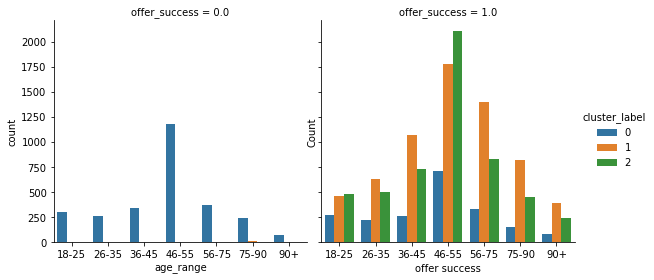

In [89]:
bins = [20, 30, 40, 50, 60, 70, 80,90]
labels =  ['18-25','26-35','36-45','46-55','56-75','75-90','90+']
cluster_transform['age_range'] = pd.cut(cluster_transform.age, bins, labels = labels,include_lowest = True)

ax = sns.catplot(x="age_range", hue="cluster_label", col="offer_success",
                data=cluster_transform, kind="count",
                height=4, aspect=1);

plt.xlabel('offer success')
plt.ylabel('Count')

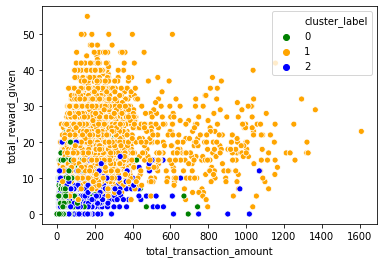

In [90]:
sns.scatterplot(data=cluster_transform,x='total_transaction_amount', y='total_reward_given',  
                hue = cluster_transform['cluster_label'],palette=['green','orange','blue'])  

Cluster 1 received more rewards and spends high amount at the starbucks. They are regular customers.

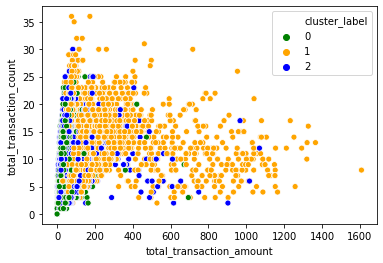

In [91]:
sns.scatterplot(data=cluster_transform,x='total_transaction_amount', y='total_transaction_count', 
                hue = cluster_transform['cluster_label'],palette=['green','orange','blue']) 

Cluster 1 has high transaction count and high transaction amount. They also respond to offer more. This group is Starbucks regular and long term customers. 

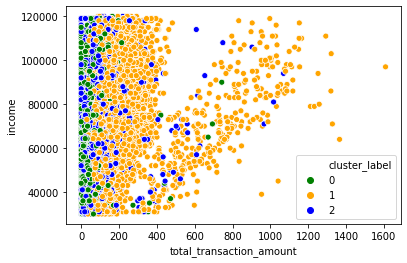

In [92]:
sns.scatterplot(data=cluster_transform,x='total_transaction_amount', y='income', 
                hue = cluster_transform['cluster_label'],palette=['green','orange','blue']) 

Customers who spend more will be regular customers. Let's have a closer look below. 

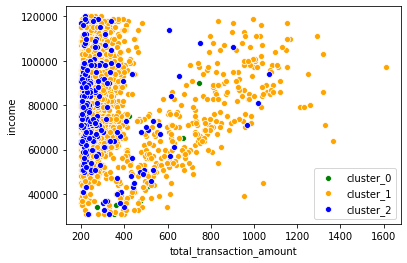

In [93]:
amount_high_0 =cluster_transform[(cluster_transform['total_transaction_amount'] >200)&\
                                 (cluster_transform['cluster_label']==0)]

amount_high_1 =cluster_transform[(cluster_transform['total_transaction_amount'] >200)&\
                                 (cluster_transform['cluster_label']==1)]

amount_high_2 =cluster_transform[(cluster_transform['total_transaction_amount'] >200)&\
                                 (cluster_transform['cluster_label']==2)]
  
ax1 = sns.scatterplot(data=amount_high_0,x='total_transaction_amount', y='income',
                      color='green', label='cluster_0')    
ax2 = sns.scatterplot(data=amount_high_1,x='total_transaction_amount', y='income', 
                      ax=ax1, color='orange',label='cluster_1')  
ax3 = sns.scatterplot(data=amount_high_2,x='total_transaction_amount', y='income', 
                      ax=ax1, color='blue',label='cluster_2'
                     
                     )   

As expected, cluser 1 has more regular customers who spend lot of money and respond to offers and have high income.
Cluster 2 major customers group has tendacy to low spend who have above average income. 

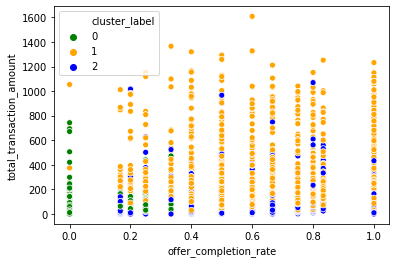

In [94]:
sns.scatterplot(data=cluster_transform,x='offer_completion_rate', y='total_transaction_amount', 
                hue = cluster_transform['cluster_label'],palette=['green','orange','blue']) 

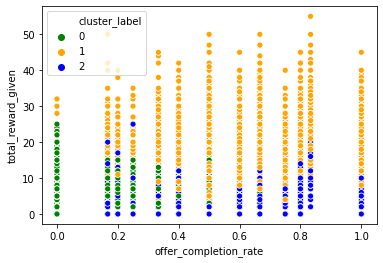

In [95]:
sns.scatterplot(data=cluster_transform,x='offer_completion_rate', y='total_reward_given', 
                hue = cluster_transform['cluster_label'], palette=['green','orange','blue']) 

Cluster 1 has high completion rate. Interestingly cluster 1 customers spend more and respond to offer. 

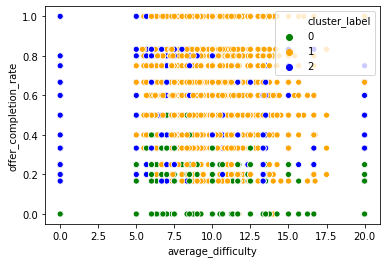

In [96]:
sns.scatterplot(data=cluster_transform,x='average_difficulty', y='offer_completion_rate', 
                hue = cluster_transform['cluster_label'], palette=['green','orange','blue'])

### Segmentation Analysis Results
The project aim is to provide with a strategy for the targeted promotional offers to high valued customers of Starbucks. Customer segmentation analysis showed the following group of customers characteristics and demographics. 

- Cluster 0: Low to medium income, male customers not influenced by offers and spends less at Starbucks. Not a regular customers. 
- Cluster 1: High income, higher spending, male & female customers which are influenced by bogo and discount offers. Starbucks regular customers.
- Cluster 2: medium to high income, dominant male customers and very responsive to informational offer. They are new members with less than 3 years of membership. 
 
Starbucks can target Cluster 1 group with bogo and discount offer. Cluster 0 are less influenced by offer. Cluster 2 customers could be targeted with informational offers for their future promotions.   

 

## Effective Prediction Model


Feature Engineering determines the performance of  the developed  model.  We have created a labelled dataset to be used for developing the supervised learning offer prediction model.  A target output is binary which predicts if customer will respond to offer or not. Benchmark model is  Logistic regressor since the business objective for Starbucks is to develop effective customer targeting. In order develop a best performing model, grid search is used to compare performance of all trained models namely, Logistic regression, Random Forest, and Gradient boosting model are compared based on AUC score. 

#####  Evaluation Metrics -
Following are the metrics used for evaluating the model performance. 

- Accuracy - The ratio of correctly predicted examples by the total examples. It shows often is the classifier correct. Accuracy may not be right metric always. AUC (area under the curve)score is used along with accuracy. 
- Receiver operating characteristic (ROC) curve - It is more visual way to measure the performance of a binary classifier is . It is created by plotting the true positive rate (TPR) (or recall) against the false positive rate (FPR),
- AUC: It provides the relation between true positive rate and false positive rate.
- ROC Curve. It provides an aggregate measure of performance across all possible classification
	thresholds.
- Confusion Matrix - table summarizing the calculated correct predictions and types of incorrect predictions.

#####  Model Selection -
I have selected three different models. Linear model and Random Forest and Gradient boosting are tree based algorithms. 
- Linear Regression - benchmark model 
- random forest - RFs train each tree independently, using a random sample of the data. This randomness helps to make the model more robust than a single decision tree, and less likely to overfit on the training data 
- gradient boost - GBT build trees one at a time, where each new tree helps to correct errors made by previously trained tree.

##### Grid Search  - 
In order to improve the model prediction, hyperparameter tuning is an important step. In this project, I will be carrying out an exhaustive grid search. I have set three levels of  hyperparameters and it tries every single possible combination of the hyperparameters as well as as many cross-validations. It is  a good way to determine the best hyperparameter values in this case since our customer dataset is not very big.

- n_estimators = number of trees in the forest
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node


In [97]:
model_df = pd.read_csv('final_customer.csv')

In [98]:
model_df.head()

,customer_id,offer_received_bogo,offer_received_discount,offer_received_informational,total_offer_received,offer_viewed_bogo,offer_viewed_discount,offer_viewed_informational,total_offer_viewed,offer_completed_bogo,offer_completed_discount,total_transaction_amount,total_transaction_count,average_transaction_amount,total_reward_given,average_reward_given,offer_completed_informational,average_difficulty,offer_success_bogo,offer_success_discount,total_success_completed,total_offer_completed,offer_view_rate,bogo_view_rate,discount_view_rate,informational_view_rate,offer_completion_rate,bogo_completion_rate,discount_completion_rate,informational_completion_rate,age,gender,income,membership_years,year,M,F,O,U,offer_success
0,0009655768c64bdeb2e877511632db8f,1.0,2.0,2.0,5.0,1.0,1.0,2.0,4.0,1.0,2.0,127.60,8.0,6.380000,9.0,0.450000,2,8.333333,0,0,2,5.0,0.8,1.0,0.5,1.0,0.4,0.0,2.0,4.0,33,1,72000,3.0,2017,1,0,0,0,1
1,00116118485d4dfda04fdbaba9a87b5c,2.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,0.0,0.0,4.09,3.0,0.584286,0.0,0.000000,0,0.000000,0,0,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,60,4,64337,2.0,2018,0,0,0,1,0
2,0011e0d4e6b944f998e987f904e8c1e5,1.0,2.0,2.0,5.0,1.0,2.0,2.0,5.0,1.0,2.0,79.46,5.0,4.414444,13.0,0.722222,2,10.666667,1,2,5,5.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,4.0,40,3,57000,2.0,2018,0,0,1,0,1
3,0020c2b971eb4e9188eac86d93036a77,2.0,2.0,1.0,5.0,1.0,1.0,1.0,3.0,1.0,2.0,196.86,8.0,10.361053,14.0,0.736842,0,10.000000,1,1,2,3.0,0.6,0.5,0.5,1.0,0.4,0.5,3.0,1.0,59,2,90000,4.0,2016,0,1,0,0,1
4,0020ccbbb6d84e358d3414a3ff76cffd,2.0,1.0,1.0,4.0,2.0,1.0,1.0,4.0,2.0,1.0,154.05,12.0,6.697826,13.0,0.565217,1,5.666667,2,1,4,4.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,24,2,60000,3.0,2016,0,1,0,0,1


In [99]:
model_df.set_index('customer_id', inplace = True, 
                            append = False, drop = True)

In [100]:
model_df.columns

Index(['offer_received_bogo', 'offer_received_discount',
       'offer_received_informational', 'total_offer_received',
       'offer_viewed_bogo', 'offer_viewed_discount',
       'offer_viewed_informational', 'total_offer_viewed',
       'offer_completed_bogo', 'offer_completed_discount',
       'total_transaction_amount', 'total_transaction_count',
       'average_transaction_amount', 'total_reward_given',
       'average_reward_given', 'offer_completed_informational',
       'average_difficulty', 'offer_success_bogo', 'offer_success_discount',
       'total_success_completed', 'total_offer_completed', 'offer_view_rate',
       'bogo_view_rate', 'discount_view_rate', 'informational_view_rate',
       'offer_completion_rate', 'bogo_completion_rate',
       'discount_completion_rate', 'informational_completion_rate', 'age',
       'gender', 'income', 'membership_years', 'year', 'M', 'F', 'O', 'U',
       'offer_success'],
      dtype='object')

In [101]:
model_df.shape



(16994, 39)

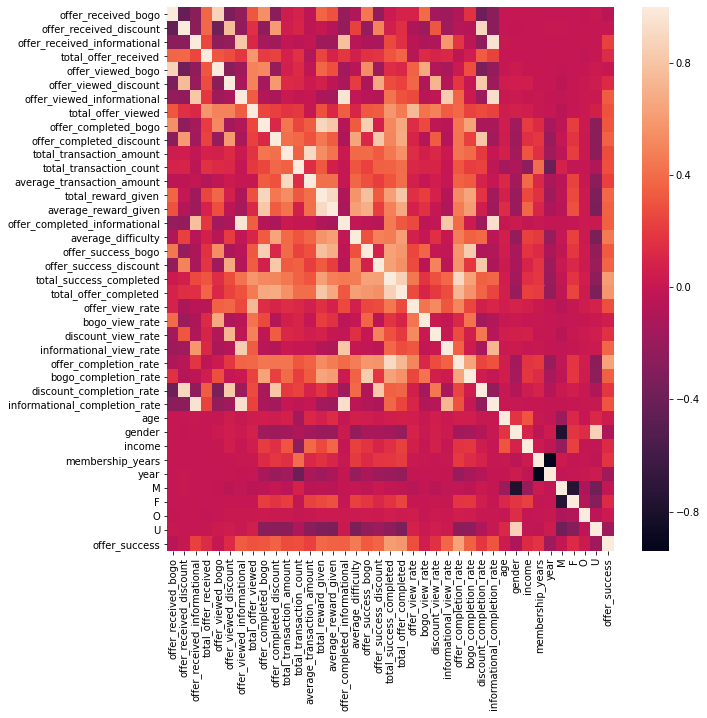

In [102]:
# plot  model dataframe heatmap
plt.figure(figsize=(10,10))
cor = model_df.corr()

sns.heatmap(cor)

##### Feature selection 
There are total 39 features. We have engineered few features. Based on the correlation values, we will remove offer received,viewed and completed features. We are removing the bogo and discount by offer view and completion rate. We will not use gender (using dummies) features. We will use average_reward given instead of the total_reward_given. We are removing the year feature. 

In [103]:
# Last column is a binary class; rest all columns are features
X_orig = model_df.drop(['gender',  'year', 'offer_success'
                       ], axis=1)

y_orig = model_df['offer_success']

In [104]:
# Last column is a binary class; rest all columns are features
X_orig = model_df.drop(['offer_received_bogo', 'offer_received_discount',
                        'offer_received_informational', 'offer_viewed_bogo',
                        'offer_viewed_discount', 'offer_viewed_informational',
                        'offer_completed_bogo', 'offer_completed_discount','informational_completion_rate',
                        'total_offer_received', 'total_offer_viewed','total_offer_completed',
                        'offer_success_bogo', 'offer_success_discount', 'total_success_completed', 
                        'offer_completed_informational','bogo_completion_rate', 'discount_completion_rate',
                        'gender',  'year', 'offer_success','offer_completion_rate','total_reward_given'
                       ], axis=1)

y_orig = model_df['offer_success']

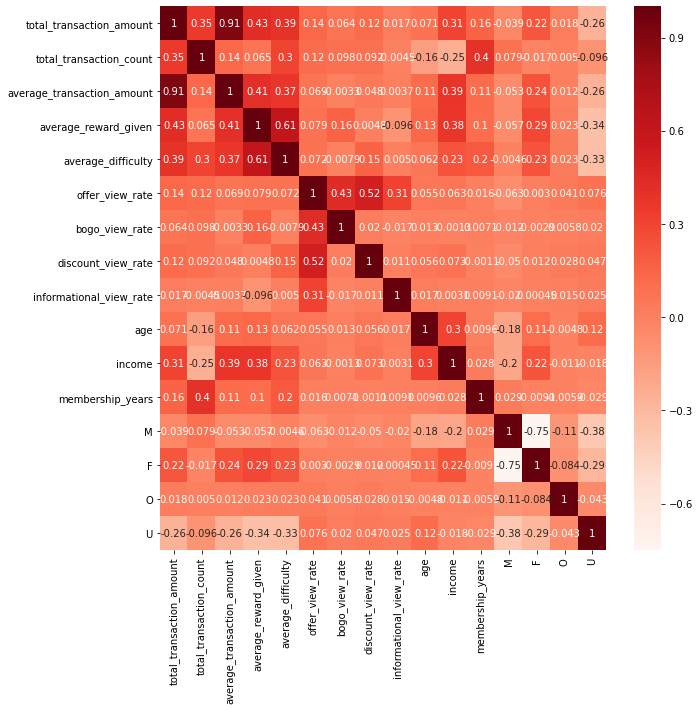

Index(['total_transaction_amount', 'total_transaction_count',
       'average_transaction_amount', 'average_reward_given',
       'average_difficulty', 'offer_view_rate', 'bogo_view_rate',
       'discount_view_rate', 'informational_view_rate', 'age', 'income',
       'membership_years', 'M', 'F', 'O', 'U'],
      dtype='object')

In [105]:
# feature selection - based on correleation matrix 
#https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf

plt.figure(figsize=(10,10))
corr_matrix = X_orig.corr()
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Reds)
plt.show()


columns = np.full((corr_matrix.shape[0],), True, dtype=bool)
for i in range(corr_matrix.shape[0]):
    for j in range(i+1, corr_matrix.shape[0]):
        if corr_matrix.iloc[i,j] >= 1.0:
            if columns[j]:
                columns[j] = False
selected_feature_list = (X_orig.columns[columns])

selected_feature_list


In [106]:
print('X : ', X_orig.shape, '\n')
print('y : Number of class values \n', y_orig.value_counts(), '\n')
print('y : Number of class values % \n', y_orig.value_counts(normalize=True))

# data split on original dataset
X_train, X_test, y_train, y_test = train_test_split(X_orig, y_orig, test_size=0.25, random_state=32, stratify=y_orig)

X :  (16994, 16) 

y : Number of class values 
 1    14192
0     2802
Name: offer_success, dtype: int64 

y : Number of class values % 
 1    0.835118
0    0.164882
Name: offer_success, dtype: float64


In [107]:

def gridsearch(pipeline, param_grid, X_train, y_train, X_test, y_test, foldsk=3, scoring_index='roc_auc'):
    
    """ 
    Grid search that returns best classifier, true positive rate, false positive rate and auc scores
    INPUT:
        pipeline: model pipeline
        param_grid : model hyper parameters 
        X_train : input training features
        y_train : outpur training features
        X_test : input training features
        y_test : outpur training features
        foldsk : corss-validation parameter
        scoring_index : auc value
        
    OUTPUT:
     gs - grid search parameters
     mtpr - matrix true positive rate
     mfpr - matrix false positive rate
     mauc - matrix AUC score
     classification report
     training and test accuracy
        
    """  
    y_test_offerfailed= np.count_nonzero(y_test==0)
    y_test_offersuccess = np.count_nonzero(y_test==1)
    start = time.time()
    gs = GridSearchCV(pipeline,
              		param_grid = param_grid,
              		scoring = scoring_index,
              		cv=foldsk, # stratified
              		refit=scoring_index,
              		return_train_score=False)
    
    gs.fit(X_train, y_train)
    probas_ = gs.predict_proba(X_test)
    
    tprs = []
    aucs = []
    mfpr = np.linspace(0, 1, 100)
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    
    tprs.append(np.interp(mfpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    
    mtpr = np.mean(tprs, axis=0)
    mtpr[-1] = 1.0
    mauc = auc(mfpr, mtpr)
    
    endt = time.time()
    print('Time elapsed = ', (endt - start)/60, ' mins \n')
    print('Best Estimator : ', gs.best_estimator_,' \n')
    print('Best Score AUC : ', gs.best_score_,' \n')
    
    pred = gs.predict(X_test)
    print('---Classification Report---\n')
    print(classification_report(y_test,pred),' \n')
    
    # confusion matrix
    cfn_matrix = confusion_matrix(y_test, pred)
    cfn_norm_matrix = np.array([[1.0 / y_test_offerfailed, 1.0/y_test_offerfailed],[1.0/y_test_offersuccess,1.0/y_test_offersuccess]])
    norm_cfn_matrix = cfn_matrix * cfn_norm_matrix
    
    # training accuracy
    train_accuracy=gs.score(X_train,y_train)
    print('training accuracy',' \n', train_accuracy)
    
    # testing accuracy 
    test_accuracy=gs.score(X_test,y_test)
    print('testing accuracy',' \n', test_accuracy)
    
  
    fig = plt.figure(figsize=(15,5))
    ax = fig.add_subplot(1,2,1)
    sns.heatmap(cfn_matrix,cmap='coolwarm_r',linewidths=0.5,annot=True,ax=ax)
    plt.title('Confusion Matrix')
    plt.ylabel('Real Classes')
    plt.xlabel('Predicted Classes')

    ax = fig.add_subplot(1,2,2)
    sns.heatmap(norm_cfn_matrix,cmap='coolwarm_r',linewidths=0.5,annot=True,ax=ax)

    plt.title('Normalized Confusion Matrix')
    plt.ylabel('Real Classes')
    plt.xlabel('Predicted Classes')
    plt.show()
    
    return gs, mtpr, mfpr, mauc

In [108]:
# plot roc curve

def plot_roc_curves(classifiers, clf_names, tprs, fprs, aucs, xlim=(-0.05, 1.05), ylim=(-0.05, 1.05)):
    
    """ 
    plot roc curve
    INPUT:
        classifiers :  selected model
        clf_names : classifier name
        tprs : true positive rate values
        fprs : false positive rate values
        aucs : auc values
    OUTPUT:
        ROC curve plot
    """  
        
    colors = ['b', 'g', 'c', 'k', 'm', 'y']
    
    plt.figure(figsize=(10,8))
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

    for i in range(len(aucs)):
        f = fprs[i]
        t = tprs[i]
        plt.plot(f, t, 
             color=colors[i],
             label=r'ROC {} (AUC = {:.4f})'.format(clf_names[i], aucs[i]),
             lw=2, 
             alpha=.8)

    plt.xlim([xlim[0], xlim[1]])
    plt.ylim([ylim[0], ylim[1]])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

In [109]:
# Define empty lists to save results

classifiers = []
tprs =[]
fprs = []
aucs = []
clf_names = []

In [110]:

def plot_feature_importance(df, model=''):
    """ 
    plot feature imporatnce 
    INPUT:
        df: DataFrame containing features
        model : classifier
    OUTPUT:
        feature importance plot
    """  
    #Sort the DataFrame in order decreasing feature importance
    df.sort_values(by=['weight'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=df['weight'], y=df['features'])
    #labels
    plt.title('Feature  Inmportance - '+ model)
    plt.xlabel('Feature  Inmportance')
    plt.ylabel('Feature  Names')

### Logistic Regression

Time elapsed =  0.1146748423576355  mins 

Best Estimator :  Pipeline(memory=None,
         steps=[('clf',
                 LogisticRegression(C=100, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.1, verbose=0,
                                    warm_start=False))],
         verbose=False)  

Best Score AUC :  0.8904702107834049  

---Classification Report---

              precision    recall  f1-score   support

           0       0.59      0.35      0.44       701
           1       0.88      0.95      0.92      3548

    accuracy                           0.85      4249
   macro avg       0.74      0.65      0.68      4249
weighted avg       0.83      0.85      0.8

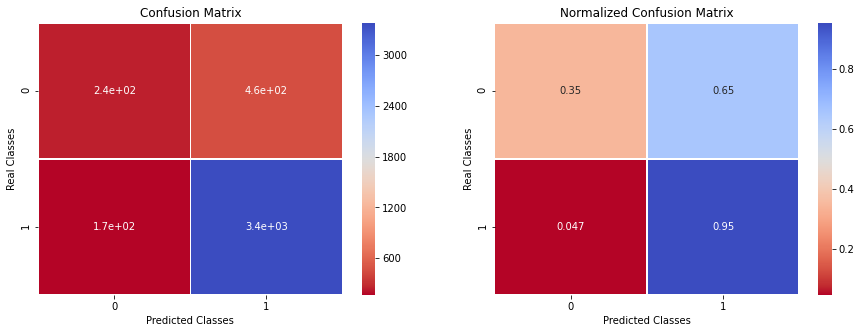

In [111]:
# Logistic Regression
clfname = 'Logistic Regression'

pipeline_LR = Pipeline([
					 ('clf', LogisticRegression())
					 ])

param_grid_LR = [{ 
			   'clf__C': [0.5, 1, 10, 10**2],
			   'clf__class_weight': [None, 'balanced'],  
			   'clf__tol': [10**-1, 10**-3, 10**-5]
	}]
    
clf, tpr, fpr, auroc = gridsearch(pipeline_LR, 
                                  param_grid_LR, 
                                  X_train, y_train, 
                                  X_test, y_test, 
                                  foldsk=3, 
                                  scoring_index='roc_auc')


clf_names.append(clfname)
classifiers.append(clf)
tprs.append(tpr)
fprs.append(fpr)
aucs.append(auroc)

### Random Forest

Time elapsed =  2.9524221301078795  mins 

Best Estimator :  Pipeline(memory=None,
         steps=[('clf',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=8, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=6,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=500, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)  

Best Score AUC :  0.9693532056261495  

---Classification Re

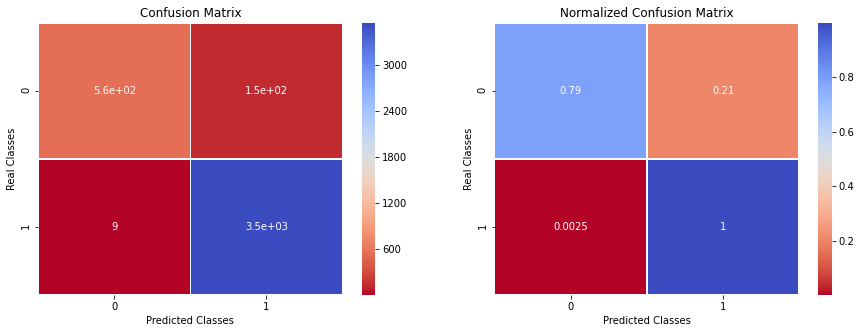

In [112]:
# RandomForestClassifier

clfname = 'Random Forest'

pipeline_RF = Pipeline([ 
					 ('clf', RandomForestClassifier())
					 ])

param_grid_RF = [{ 
				 'clf__max_depth': [3, 5, 8],
				  'clf__min_samples_split': [3, 6, 8],
				'clf__criterion': ['gini', 'entropy'],
                'clf__n_estimators': [50, 100, 500]
	}]  

clf, tpr, fpr, auroc = gridsearch(pipeline_RF, 
                                  param_grid_RF, 
                                  X_train, y_train, 
                                  X_test, y_test, 
                                  foldsk=3, 
                                  scoring_index='roc_auc')

clf_names.append(clfname)
classifiers.append(clf)
tprs.append(tpr)
fprs.append(fpr)
aucs.append(auroc)

### Model Evaluation and Results

- Logistic regressor benchmark model AUC score was  0.8711. 
- Grid search helped to improve the random forest model to 0.9723.
- Training and test accuracy for the random forest is comparable (training accuracy = 0.9905 and testing accuracy = 0.9742)
- Based on correlation heatmap, we removed few features. It helped to reduce the over-fitting. 
#####  Feature importance 
- Top 5 features information view rate, offer difficulty, average reward given, total transaction amount and offer view rate are important features. In other words, if offer is viewed then more likelyhood of completion. When customer is spending lot of money, he is regular Starbucks customer so interested in offers. Obviously offer difficulty amount will determine if customer will use offer or not. 
-  Income, age are at the bottom of feature importance. We have seen from EDA that high income people spend more amount. and older people are Starbucks main customer base. Overall, I am surprised that demographic features are not at the top. 
-  Gender did not play important role. 

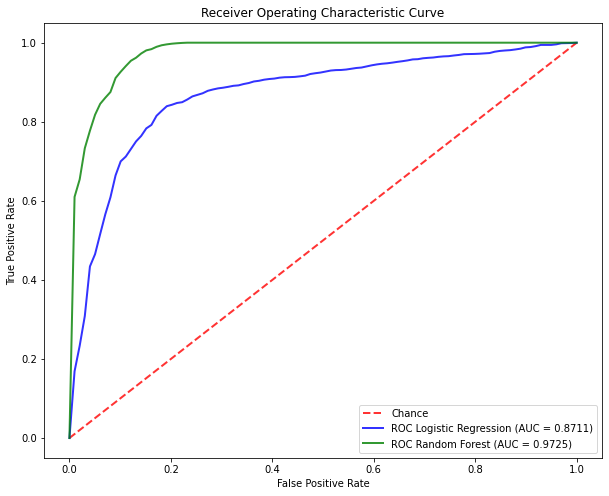

In [113]:

plot_roc_curves(classifiers, clf_names, tprs, fprs, aucs, xlim=(-0.05, 1.05), ylim=(-0.05, 1.05))

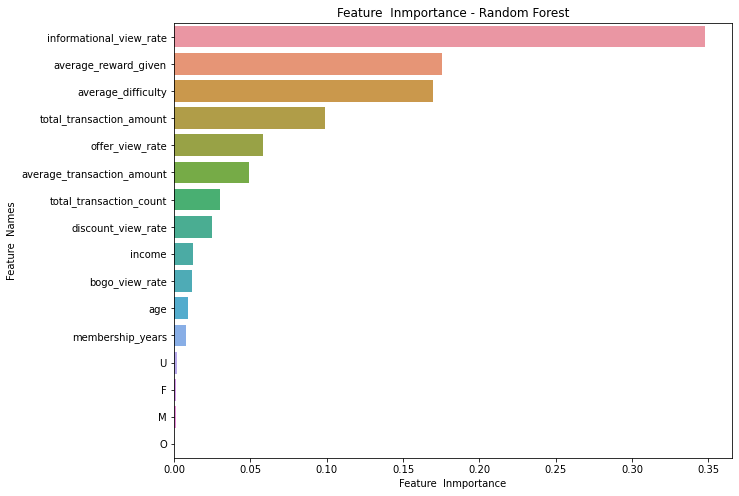

In [114]:
# Feature importance
feat_imp = pd.DataFrame({'features':X_train.columns,'weight':clf.best_estimator_.named_steps['clf'].feature_importances_})
feat_imp.sort_values(by=['weight'], ascending=False,inplace=True)

plot_feature_importance(feat_imp, model=clfname)

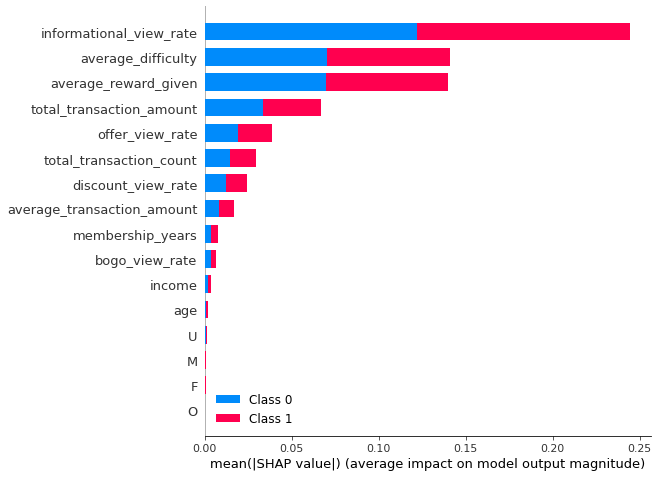

In [115]:
import shap
shap_values = shap.TreeExplainer(clf.best_estimator_.named_steps['clf']).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [116]:
results = pd.DataFrame({'Classifier Name':clf_names, 'AUC':aucs})

results


,Classifier Name,AUC
0,Logistic Regression,0.871095
1,Random Forest,0.972513


In [117]:
pred_proba = clf.predict_proba(X_test)

pred_proba_randomforest = pd.DataFrame()
pred_proba_randomforest['Target'] = y_test
pred_proba_randomforest['prob_0'] = pred_proba[:,0]  
pred_proba_randomforest['prob_1'] = pred_proba[:,1]  
pred_proba_randomforest.head(10)


,Target,prob_0,prob_1
customer_id,,,
08e66f9936c545d4aedf21d35b96baf6,1,0.002508,0.997492
6d8a255c4ce64314afab49e51914c7c7,1,0.009189,0.990811
df6455c3563f467bb74f1c17e84cc83d,1,0.001266,0.998734
b13e68942b4a47f6b0aa518eb69adb47,1,0.002175,0.997825
46bff6d3b8fb462880a0d476c3945c33,1,0.001101,0.998899
f653cf2d8bba42d0a53c2937ee2e5893,1,0.043584,0.956416
169ad543fdaa433a820d84502c32a826,1,0.152230,0.847770
139ba634b97a48699224973289e3b484,1,0.009179,0.990821
c6c1259f6fbc4e6c82a7b9dd3c83f636,1,0.151717,0.848283


Model predicted test data set results accurately. 

## Conclusions and Future Improvements
Market segmentation, targeting, and positioning (STP) process influence a company’s strategy for pricing, communication, and customer management. Thus, this capstone project was interesting to get hand on experience to solve an important business problem. The project goal was to develop which offer is effective for the Starbucks customer using the provided dataset. Data cleaning, feature engineering and model development were straight forward tasks. As mentioned in the Starbucks challenge, the challenging part was to create an offer dataframe based on the merged customer profile and transactions dataset. 

Overall, the customer segmentation gave insight about who are the real Starbucks customers. There are three distinct groups of customers. The customer segmentation analysis provided direction for the targeted offer promotion. The effective offer prediction model performance on the test dataset provided 97\% accuracy and AUC score. The offer prediction test results confirmed that model is not over-fitting.  


#####  Improvements

- Bogo, Discount and Informational separate offer model can be developed to recommend specific offers to be sent to customers. 
- Missing features were imputed. Implementing machine learning based missing value prediction. 
- Using different clustering algorithm.
- Recommendation system to suggest right offers to right customers. 


## References
- https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby/45925961
- https://stackoverflow.com/questions/51102205/how-to-know-the-labels-assigned-by-astypecategory-cat-codes
- https://stackoverflow.com/questions/45312377/how-to-one-hot-encode-from-a-pandas-column-containing-a-list
- https://stackoverflow.com/questions/50522146/pandas-column-dict-split-to-new-column-and-rows
- https://stackoverflow.com/questions/56421683/how-to-apply-a-function-for-each-row-of-a-dataframe-which-checks-keys-of-embedd
- https://stackoverflow.com/questions/41455967/convert-datetime-string-to-new-columns-of-day-month-year-in-pandas-data-frame/41456152
- https://stackoverflow.com/questions/43133605/convert-integer-yyyymmdd-to-date-format-mm-dd-yyyy-in-python
- https://stackoverflow.com/questions/17134716/convert-dataframe-column-type-from-string-to-datetime-dd-mm-yyyy-format
- https://stackoverflow.com/questions/49742938/checking-isdigit-on-python
- https://towardsdatascience.com/flattening-json-objects-in-python-f5343c794b10
- https://medium.com/@vinitasilaparasetty/guide-to-defining-problem-statements-baf52219ea5b
- https://medium.com/@george.drakos62/handling-missing-values-in-machine-learning-part-1-dda69d4f88ca
- http://fluidsurveys.com/university/difference-response-rate-completion-rate/
- https://towardsdatascience.com/the-5-feature-selection-algorithms-every-data-scientist-need-to-know-3a6b566efd2
- https://towardsdatascience.com/optimizing-hyperparameters-in-random-forest-classification-ec7741f9d3f6